In [1]:
import numpy as np #imports numpy as np
import pandas as pd #imports pandas as pd
import math #imports math for calculation
import matplotlib.pyplot as plt #for data visialisation
import statistics #imports library for statistics
from scipy.stats import mode #reference: https://stackoverflow.com/questions/29159218/find-the-mode-of-a-list-of-numbers-in-python
import seaborn as sns #import library for data visialisation
%matplotlib inline
import datetime

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
data_dir = "/content/gdrive/MyDrive/Big Data Files"



In [3]:

# importing of road traffic accident data
df_accident = pd.read_csv('/content/gdrive/MyDrive/Big Data Files/Road Safety Data - Accidents 2019.csv')
df_casualties = pd.read_csv('/content/gdrive/MyDrive/Big Data Files/Road Safety Data - Casualties 2019.csv')
df_vehicles = pd.read_csv('/content/gdrive/MyDrive/Big Data Files/Road Safety Data- Vehicles 2019.csv')
government_details = pd.read_csv('/content/gdrive/MyDrive/Big Data Files/cas_adjustment_lookup_2019.csv')




# df_accident =pd.read_csv('Road Safety Data - Accidents 2019.csv')  #reads the dataset with pandas
# df_casualties = pd.read_csv('Road Safety Data - Casualties 2019.csv')  #reads the dataset with pandas
# df_vehicles = pd.read_csv('Road Safety Data- Vehicles 2019.csv')  #reads the dataset with pandas

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_accident
df_casualties
df_vehicles

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,4,19,0,18,0,0,0,0,0,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,2,9,0,18,0,1,0,0,0,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,1,9,0,7,0,6,0,0,3,...,5,1,78,11,1597,2,6,8,3,8


In [5]:
df_accident.shape

(117536, 32)

In [6]:
df_accident[df_accident['Latitude'].isnull()]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
27337,2019040854828,NaN,NaN,NaN,NaN,4,3,2,1,21/06/2019,...,0,0,1,1,1,0,0,3,2,NaN
29369,2019051910615,NaN,NaN,NaN,NaN,5,3,1,1,04/03/2019,...,0,0,4,5,2,0,0,3,1,NaN
30791,2019051912864,NaN,NaN,NaN,NaN,5,2,2,2,08/11/2019,...,0,0,6,1,2,0,0,3,1,NaN
34816,2019070003662,NaN,NaN,NaN,NaN,7,3,1,1,04/01/2019,...,0,0,1,9,1,0,0,3,1,NaN
35505,2019070275916,NaN,NaN,NaN,NaN,7,3,2,1,28/05/2019,...,0,0,1,1,1,0,0,3,2,NaN
36347,2019070700923,NaN,NaN,NaN,NaN,7,3,2,1,30/11/2019,...,0,0,1,1,1,0,0,3,1,NaN
39798,2019121900341,NaN,NaN,NaN,NaN,12,2,1,2,24/02/2019,...,0,0,1,1,1,0,0,3,1,NaN
39919,2019121900485,NaN,NaN,NaN,NaN,12,3,2,3,08/04/2019,...,0,0,1,1,1,0,0,3,1,NaN
39933,2019121900505,NaN,NaN,NaN,NaN,12,3,2,1,18/03/2019,...,0,0,4,1,2,0,0,3,1,NaN
40179,2019121900771,NaN,NaN,NaN,NaN,12,3,3,1,02/02/2019,...,0,0,1,3,3,0,0,3,1,NaN


In [7]:
df_casualties.shape

(153158, 16)

In [8]:
df_vehicles

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,4,19,0,18,0,0,0,0,0,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,2,9,0,18,0,1,0,0,0,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,1,9,0,7,0,6,0,0,3,...,5,1,78,11,1597,2,6,8,3,8


In [9]:
df_vehicles.shape

(216381, 23)

# Merging the tables

In [10]:
accident_casualty = pd.merge(df_accident, df_casualties,   on=['Accident_Index'], how='inner') 
accident_casualty.shape

(128593, 47)

In [11]:
combined_table = pd.merge(accident_casualty, df_vehicles, on=['Accident_Index'], how='inner' )
combined_table

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,1,58,9,-1,-1,-1,2,1,2
3,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,3,-1,-1,-1,-1,-1,2,1,2
4,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,1,58,9,-1,-1,-1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210435,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,1,1,20,4,2198,2,4,5,3,5
210436,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,6,1,33,6,1997,2,12,3,2,3
210437,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,6,1,61,9,2967,2,5,7,3,7
210438,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,5,1,78,11,1597,2,6,8,3,8


In [12]:
combined_table.shape

(210440, 69)

In [13]:
pd.set_option('display.max_columns', None) #to display all the columns in the combined dataframe

In [14]:
combined_table.head(30)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
3,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2
4,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
5,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2
6,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,9,E09000022,3,23,2,30,0,-1,-1,0,-1,-1,4,1,1,0,0,1,3,E01003117,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3,1,9,0,18,-1,0,-1,-1,-1,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3
7,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,9,E09000022,3,23,2,30,0,-1,-1,0,-1,-1,4,1,1,0,0,1,3,E01003117,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3,2,9,0,18,-1,0,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,6,1,6
8,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,2,E09000007,4,504,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01000943,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1,1,9,0,3,0,1,0,0,0,0,2,1,6,1,45,7,-1,-1,-1,4,1,4
9,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,2,E09000007,4,504,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01000943,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1,2,1,0,4,0,1,0,0,0,0,1,1,1,1,33,6,-1,-1,-1,-1,-1,-1


# EXPLORATORY DATA ANALYSIS AND DATA CLEANING



In [15]:
# from pandas_profiling import ProfileReport

In [16]:
# profile_accident = ProfileReport(combined_table)
# profile_accident

Columns with missing values in accident dataframe

Location_Easting_OSGR, Location North_ OSGR, Latitude, Longitude --- 28 values

Time --- 63 values

LSOA_of_Accident_Location -- - 5714 (4.9%)


In [17]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [18]:
df_accident.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [19]:
df_accident.shape

(117536, 32)

As seen above: Location_Easting_OSGR, Location_Northing_OSGR, Longitude, Latitude, Time, LSOA_of_Accident_Location are the only variables with null values                                                                  

In [20]:
df_accident[df_accident['Location_Easting_OSGR'].isna()] #this shows corresponding null values for Location_Northing_OSGR	Longitude	Latitude


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
27337,2019040854828,NaN,NaN,NaN,NaN,4,3,2,1,21/06/2019,6,20:15,114,E08000010,1,6,3,70,0,-1,-1,0,0,0,1,1,1,0,0,3,2,NaN
29369,2019051910615,NaN,NaN,NaN,NaN,5,3,1,1,04/03/2019,2,17:50,95,E08000015,6,0,6,30,3,4,6,0,0,0,4,5,2,0,0,3,1,NaN
30791,2019051912864,NaN,NaN,NaN,NaN,5,2,2,2,08/11/2019,6,19:18,91,E08000012,6,0,6,30,0,-1,-1,0,0,0,6,1,2,0,0,3,1,NaN
34816,2019070003662,NaN,NaN,NaN,NaN,7,3,1,1,04/01/2019,6,15:56,130,E06000050,3,5268,6,30,9,2,6,0,0,0,1,9,1,0,0,3,1,NaN
35505,2019070275916,NaN,NaN,NaN,NaN,7,3,2,1,28/05/2019,3,18:00,128,E06000007,3,574,1,30,1,4,3,574,0,0,1,1,1,0,0,3,2,NaN
36347,2019070700923,NaN,NaN,NaN,NaN,7,3,2,1,30/11/2019,7,11:35,129,E06000049,3,34,1,50,1,2,3,555,0,0,1,1,1,0,0,3,1,NaN
39798,2019121900341,NaN,NaN,NaN,NaN,12,2,1,2,24/02/2019,1,15:38,187,E10000023,3,63,3,70,0,-1,-1,0,0,0,1,1,1,0,0,3,1,NaN
39919,2019121900485,NaN,NaN,NaN,NaN,12,3,2,3,08/04/2019,2,08:47,185,E10000023,3,64,3,70,3,4,6,0,0,0,1,1,1,0,0,3,1,NaN
39933,2019121900505,NaN,NaN,NaN,NaN,12,3,2,1,18/03/2019,2,17:57,182,E10000023,6,0,6,30,3,4,3,59,0,0,4,1,2,0,0,3,1,NaN
40179,2019121900771,NaN,NaN,NaN,NaN,12,3,3,1,02/02/2019,7,10:29,186,E10000023,4,1229,6,60,0,-1,-1,0,0,0,1,3,3,0,0,3,1,NaN


In [21]:
df_accident[df_accident['Time'].isna()]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
578,2019010157254,533599.0,193819.0,-0.071257,51.627336,1,3,2,1,13/01/2019,1,NaN,32,E09000010,4,154,6,20,-1,-1,6,0,0,0,7,1,2,0,0,1,3,E01001461
582,2019010157270,534633.0,181247.0,-0.061140,51.514114,1,3,2,1,10/01/2019,5,NaN,5,E09000030,6,0,6,20,6,2,6,0,-1,1,1,8,1,0,0,1,3,E01004304
2326,2019010162544,529616.0,180782.0,-0.133571,51.511108,1,3,1,1,10/02/2019,1,NaN,1,E09000033,3,401,6,20,3,2,6,0,0,0,4,5,2,0,0,1,1,E01004763
2417,2019010162834,528247.0,174040.0,-0.155733,51.450830,1,3,2,1,10/02/2019,1,NaN,10,E09000032,4,237,9,20,-1,-1,6,0,-1,-1,4,5,2,-1,-1,1,3,E01004479
2570,2019010163302,526839.0,182474.0,-0.172958,51.526944,1,3,2,1,14/02/2019,5,NaN,1,E09000033,4,507,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01004725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44094,2019136B70166,440156.0,423928.0,-1.393107,53.710255,13,3,2,1,07/11/2019,5,NaN,206,E08000036,3,655,1,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01011758
44177,2019136BD1094,428516.0,432660.0,-1.568648,53.789497,13,3,2,1,07/11/2019,5,NaN,204,E08000035,3,62,6,30,0,-1,-1,0,0,0,1,1,2,0,0,1,2,E01011363
44186,2019136BE0937,429859.0,433789.0,-1.548155,53.799569,13,3,2,1,14/11/2019,5,NaN,204,E08000035,6,0,6,30,0,-1,-1,0,0,0,4,2,2,0,0,1,2,E01033008
44582,2019136CI1516,415080.0,437637.0,-1.772344,53.834788,13,3,1,1,18/12/2019,4,NaN,200,E08000032,3,657,6,30,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01010782


In [22]:
df_accident.isnull().sum() #shows no more null values 

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [23]:
df_accident.isnull().sum() #shows no more null values 

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [24]:
combined_table.isnull().sum()

Accident_Index             0
Location_Easting_OSGR     80
Location_Northing_OSGR    80
Longitude                 80
Latitude                  80
                          ..
Propulsion_Code            0
Age_of_Vehicle             0
Driver_IMD_Decile          0
Driver_Home_Area_Type      0
Vehicle_IMD_Decile         0
Length: 69, dtype: int64

In [25]:
df_accident['Location_Northing_OSGR'].mode()

0    180819.0
1    180992.0
2    181092.0
3    182780.0
dtype: float64

# Data Cleaning

In [26]:
combined_table.isnull().sum()

Accident_Index             0
Location_Easting_OSGR     80
Location_Northing_OSGR    80
Longitude                 80
Latitude                  80
                          ..
Propulsion_Code            0
Age_of_Vehicle             0
Driver_IMD_Decile          0
Driver_Home_Area_Type      0
Vehicle_IMD_Decile         0
Length: 69, dtype: int64

In [27]:
combined_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210440 entries, 0 to 210439
Data columns (total 69 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               210440 non-null  object 
 1   Location_Easting_OSGR                        210360 non-null  float64
 2   Location_Northing_OSGR                       210360 non-null  float64
 3   Longitude                                    210360 non-null  float64
 4   Latitude                                     210360 non-null  float64
 5   Police_Force                                 210440 non-null  int64  
 6   Accident_Severity                            210440 non-null  int64  
 7   Number_of_Vehicles                           210440 non-null  int64  
 8   Number_of_Casualties                         210440 non-null  int64  
 9   Date                                         210440 non-nul

In [28]:
combined_table[combined_table['Latitude'].isnull()]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
36431,2019040854828,NaN,NaN,NaN,NaN,4,3,2,1,21/06/2019,6,20:15,114,E08000010,1,6,3,70,0,-1,-1,0,0,0,1,1,1,0,0,3,2,NaN,2,1,1,1,24,5,3,0,0,0,0,0,9,1,2,1,9,0,7,0,0,0,0,0,0,2,1,6,3,-1,-1,1299,1,18,-1,-1,-1
36432,2019040854828,NaN,NaN,NaN,NaN,4,3,2,1,21/06/2019,6,20:15,114,E08000010,1,6,3,70,0,-1,-1,0,0,0,1,1,1,0,0,3,2,NaN,2,1,1,1,24,5,3,0,0,0,0,0,9,1,2,2,9,0,18,0,0,0,0,0,0,1,1,5,1,24,5,1498,1,10,2,1,2
41864,2019051910615,NaN,NaN,NaN,NaN,5,3,1,1,04/03/2019,2,17:50,95,E08000015,6,0,6,30,3,4,6,0,0,0,4,5,2,0,0,3,1,NaN,1,1,3,2,10,2,3,5,1,0,0,0,0,1,1,1,8,0,18,0,1,0,0,0,0,1,1,1,1,52,8,2496,2,19,1,1,1
45241,2019051912864,NaN,NaN,NaN,NaN,5,2,2,2,08/11/2019,6,19:18,91,E08000012,6,0,6,30,0,-1,-1,0,0,0,6,1,2,0,0,3,1,NaN,1,2,1,1,25,5,2,0,0,0,0,0,9,1,8,1,9,0,18,0,0,0,0,0,0,1,1,6,1,25,5,1984,1,1,8,1,8
45242,2019051912864,NaN,NaN,NaN,NaN,5,2,2,2,08/11/2019,6,19:18,91,E08000012,6,0,6,30,0,-1,-1,0,0,0,6,1,2,0,0,3,1,NaN,1,2,1,1,25,5,2,0,0,0,0,0,9,1,8,2,19,0,18,0,0,0,0,0,0,1,1,1,1,55,8,1995,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191545,2019621900922,NaN,NaN,NaN,NaN,62,3,3,3,21/06/2019,6,16:49,741,W06000015,3,48,3,60,3,4,6,0,0,0,1,1,1,0,0,3,1,NaN,3,3,1,1,31,6,3,0,0,0,0,0,9,1,1,1,9,0,9,0,6,0,0,0,0,3,1,6,1,31,6,1686,2,6,5,2,5
191546,2019621900922,NaN,NaN,NaN,NaN,62,3,3,3,21/06/2019,6,16:49,741,W06000015,3,48,3,60,3,4,6,0,0,0,1,1,1,0,0,3,1,NaN,3,3,1,1,31,6,3,0,0,0,0,0,9,1,1,2,9,0,11,0,1,0,0,0,0,1,1,6,2,28,6,2143,2,2,2,1,2
191547,2019621900922,NaN,NaN,NaN,NaN,62,3,3,3,21/06/2019,6,16:49,741,W06000015,3,48,3,60,3,4,6,0,0,0,1,1,1,0,0,3,1,NaN,3,3,1,1,31,6,3,0,0,0,0,0,9,1,1,3,9,0,18,0,1,0,0,0,0,4,1,6,1,31,6,1560,2,12,1,1,1
196221,201963D115219,NaN,NaN,NaN,NaN,63,3,2,1,29/11/2019,6,15:20,753,W06000023,3,44,6,60,0,-1,-1,0,0,0,1,1,1,0,0,3,2,NaN,2,1,1,1,25,5,3,0,0,0,0,0,19,2,4,1,9,0,13,0,0,0,0,0,0,3,1,6,2,36,7,1368,1,10,6,2,6


In [29]:
combined_table.shape

(210440, 69)

In [30]:
# pd.set_option('display.max_rows', None)

# Updating the null values

Replacing the nan values with a measure of central centendy (mean or mode) for Location_Easting_OSGR ,Location_Northing_OSGR, Longitude, Latitude  and LSOA_of_Accident_Location 

In [31]:
for columns in ['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude']:
    #this replaces the four columns above with their mean values of the AREA as indicated by the police force
    combined_table[columns] = combined_table[columns].fillna(combined_table.groupby('Police_Force')[columns].transform('mean'))
for column in ['Time','LSOA_of_Accident_Location' ]:
    #since the numbers of null vaules in the 'Time column' is insignificant out of the whole data and LSOA_of_Accident_Location will not affect my analysis; forward will was done
    combined_table[column] = combined_table[column].fillna(method = 'ffill')    
            

# Confirming the null values have been updated

In [32]:
#shows there  are no null values for in the Latitude, Longitude,Location_Easting_OSGR,Location_Northing_OSGR
#please note the nan values in the four columns are in the same rows... hence checking on column would suffice
combined_table[combined_table['Latitude'].isnull()]


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile


# Confirming null values for Time  and LSOA_of_Accident_Location

In [33]:
combined_table[combined_table['Time'].isnull()]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile


In [34]:
combined_table[combined_table['LSOA_of_Accident_Location'].isnull()]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile


# Question (a)	Are there significant hours of the day, and days of the week, on which accidents occur?

In [35]:
# function to get hour of accidence oocurence
def hour_maker(string):
    value=string[0:2]
    return int(value)
#using the lambda function to apply the function to the dataframe
combined_table['Hour'] = combined_table['Time'].apply(lambda x: hour_maker(x))

In [36]:
combined_table

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17
3,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17
4,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210435,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,5,08:46,917,S12000006,3,7,6,60,0,-1,-1,0,0,0,1,1,2,0,0,2,1,W01000474,1,1,1,1,22,5,3,0,0,0,0,0,19,1,1,4,19,0,18,0,0,0,0,0,0,3,1,1,1,20,4,2198,2,4,5,3,5,8
210436,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,917,S12000006,4,723,6,60,3,4,4,721,0,0,1,1,1,0,0,2,2,W01000474,2,1,1,1,61,9,3,0,0,0,0,0,9,3,7,1,9,0,18,0,1,0,0,0,0,1,1,6,1,33,6,1997,2,12,3,2,3,15
210437,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,917,S12000006,4,723,6,60,3,4,4,721,0,0,1,1,1,0,0,2,2,W01000474,2,1,1,1,61,9,3,0,0,0,0,0,9,3,7,2,9,0,18,0,1,0,0,0,0,0,1,6,1,61,9,2967,2,5,7,3,7,15
210438,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,7,14:10,917,S12000006,6,710,6,30,3,4,6,723,0,0,1,1,1,0,0,2,2,W01000474,1,1,3,1,54,8,3,5,3,0,0,0,0,3,8,1,9,0,7,0,6,0,0,3,0,3,1,5,1,78,11,1597,2,6,8,3,8,14


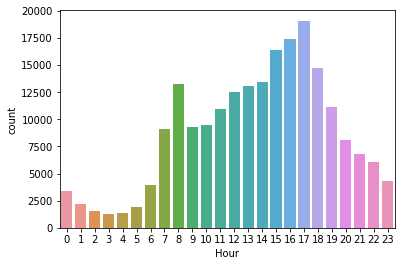

In [37]:
sns.countplot(data=combined_table, x= 'Hour')

# Defining a function for count plot with percentages

References: Please refer to - https://stackoverflow.com/questions/69690399/how-to-add-percentages-on-countplot-in-seaborn?noredirect=1

https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

In [38]:
def countplot_percentage(data, X, column):
    sns.set(style="ticks")
    plt.figure(figsize=(10,10))
    plot_sns = sns.countplot(x=X,data=data, palette = "Set2")
    plot_sns.set(xlabel=X, ylabel='Count')
    plt.xticks(rotation=10)
    for i in plot_sns.patches: 
        height = i.get_height() 
        plot_sns.text(i.get_x()+i.get_width()/2., 
          height + 3, 
          '{:1.2f}'.format((height/len(data))*100)+'%',  
          ha="center") 
    plt.title(f" Graph showing {column} with %")      
    plt.show()
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

#CREATING ANOTHER FUNCTION FOR COUNTPLOT; HUE==LIGHT CONDITION
def countplot_percentage_with_conditions(data, X, column):
    sns.set(style="ticks")
    plt.figure(figsize=(20,20))
    plot_sns = sns.countplot(x=X,data=data, palette = "Set2" , hue="Light_Conditions")
    plot_sns.set(xlabel=X, ylabel='Count')
    plt.xticks(rotation=10)
    for i in plot_sns.patches: 
        height = i.get_height() 
        plot_sns.text(i.get_x()+i.get_width()/2., 
          height + 3, 
          '{:1.2f}'.format((height/len(data))*100)+'%',  
          ha="center") 
    plt.title(f" Graph showing {column} with %")      
    plt.show()
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

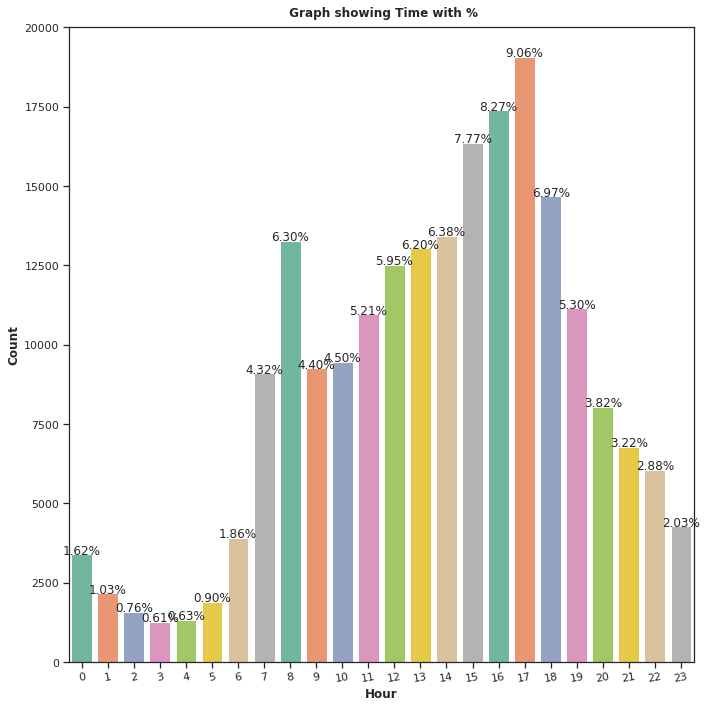

In [39]:
countplot_percentage(combined_table, 'Hour', 'Time')

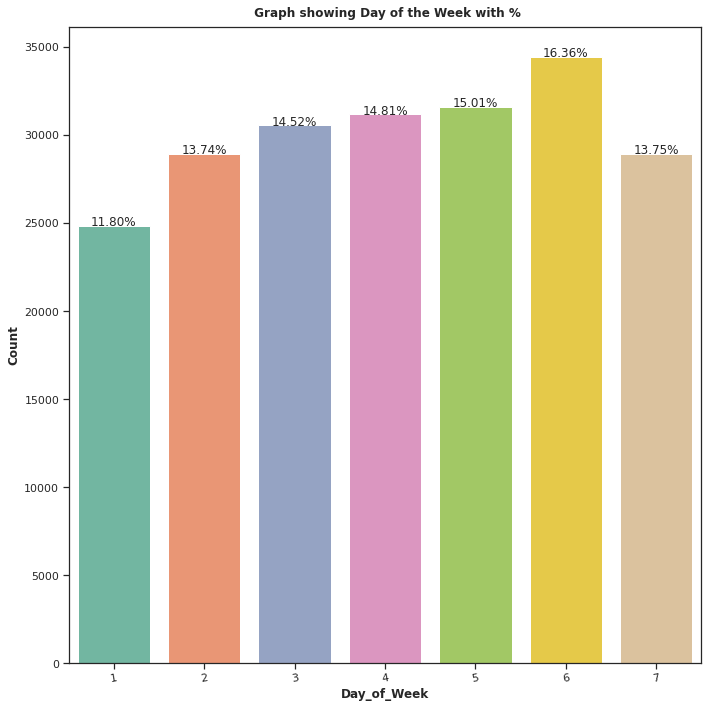

In [40]:
#Ploting for the days of the week
countplot_percentage(combined_table, 'Day_of_Week', 'Day of the Week')

Updating the Light conditions column with the real values while the null values replace with the mode i.e. 1 which denoted day light and Darkness - lighting unknown turned to Darkness no light

In [41]:
 combined_table['Light_Conditions'].mode()

0    1
dtype: int64

In [42]:
combined_table['Light_Conditions'] =  combined_table['Light_Conditions'].apply (lambda x: 'Daylight' if x==1 or x==-1 else ('Darkness - lights lit' if x==4 else 
                                                                                                ('Darkness' if x==5 or x==6 or x==7 else 
                                                                                                ('Saturday' if x==7 else x))))


In [43]:
#also in df_accident Dataframe
df_accident['Light_Conditions'] =  df_accident['Light_Conditions'].apply (lambda x: 'Daylight' if x==1 or x==-1 else ('Darkness - lights lit' if x==4 else 
                                                                                                ('Darkness' if x==5 or x==6 or x==7 else 
                                                                                                ('Saturday' if x==7 else x))))

In [44]:
combined_table['Light_Conditions'].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness'], dtype=object)

Using lambda function with comprehension to replace the numbers that denotes actual day with the days of the week as indicated in the variable look up file.... and creates a new column for day

In [45]:
combined_table['Weekdays'] =  combined_table['Day_of_Week'].apply (lambda x: 'Sunday' if x==1 else ('Monday' if x==2 else 
                                                                                                ('Tuesday' if x==3 else 
                                                                                                ('Wednesday' if x==4 else 
                                                                                                ('Thursday' if x==5 else 
                                                                                                ('Friday' if x==6 else 
                                                                                                ('Saturday' if x==7 else x)))))))

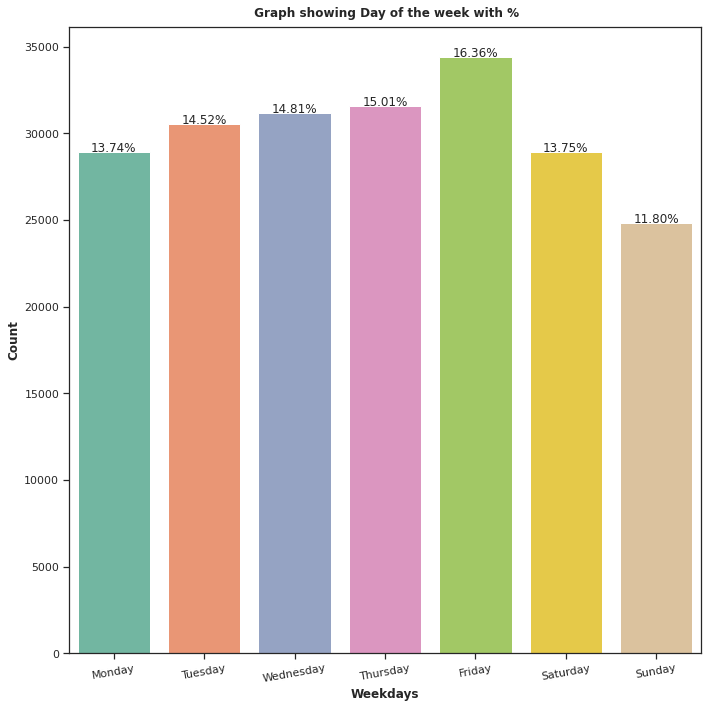

In [46]:
countplot_percentage(combined_table, 'Weekdays', 'Day of the week')

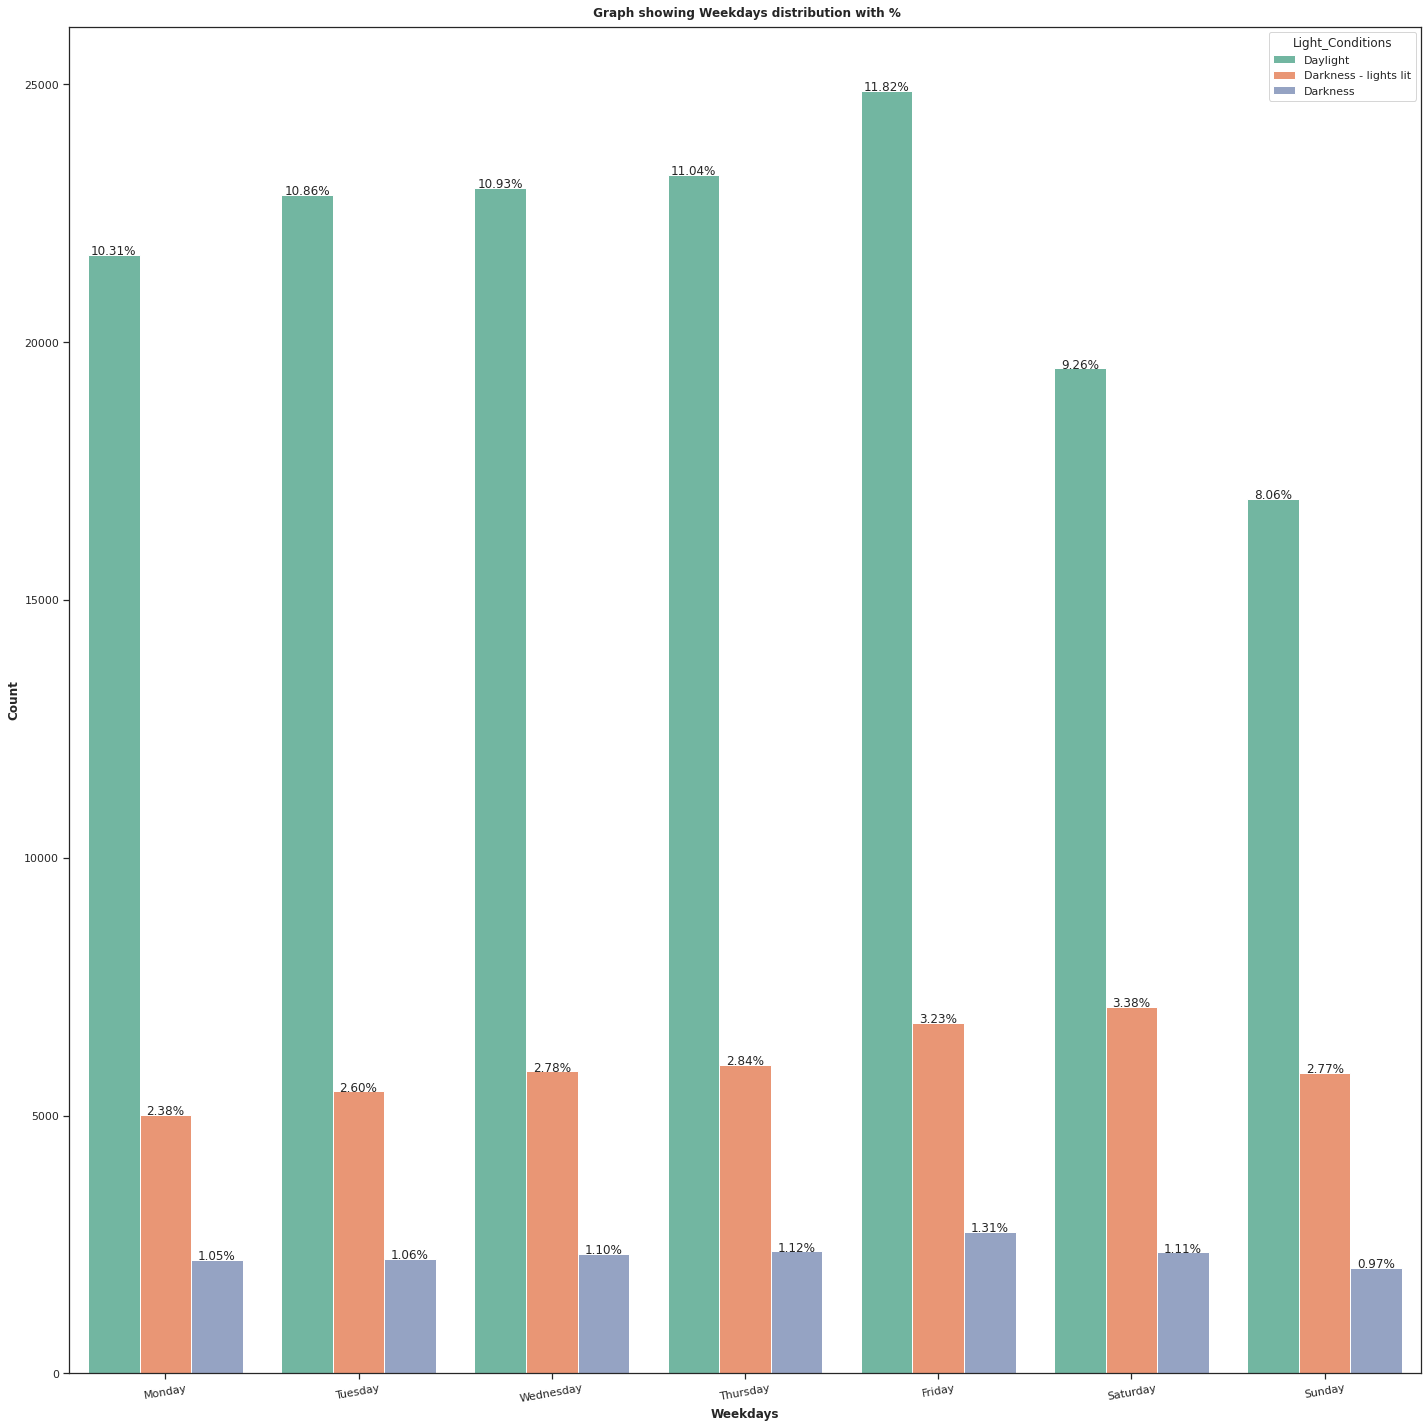

In [47]:
countplot_percentage_with_conditions(combined_table, 'Weekdays', 'Weekdays distribution')

# Question b 

(b)	For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?

Creating another function that groups the vehicle type and also replaces the numbers that depicts them with their actual names
The numbers are 2,3,4,5,22,23 and 97 for motobikes

Here, null value entries as indicated by 'variable look up file' were merged with other vehicles

In [48]:
df_accident


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,9,E09000022,3,23,2,30,0,-1,-1,0,-1,-1,Darkness - lights lit,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,2,E09000007,4,504,6,30,3,4,6,0,0,0,Darkness - lights lit,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,3,01:20,2,E09000007,4,510,6,20,3,4,4,510,0,0,Darkness - lights lit,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,3,00:40,28,E09000005,3,4003,6,30,6,4,6,0,0,0,Darkness - lights lit,1,1,0,0,1,1,E01000546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,7,01:00,917,S12000006,4,725,6,60,0,-1,-1,0,0,0,Daylight,1,2,0,0,2,1,NaN
117532,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,5,08:46,917,S12000006,3,7,6,60,0,-1,-1,0,0,0,Daylight,1,2,0,0,2,1,NaN
117533,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,917,S12000006,4,723,6,60,3,4,4,721,0,0,Daylight,1,1,0,0,2,2,NaN
117534,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,7,14:10,917,S12000006,6,710,6,30,3,4,6,723,0,0,Daylight,1,1,0,0,2,2,NaN


In [49]:
#ALSO EFFECTING IT THE NEW COLUMN IN THE NEW DATAFRAME
combined_table['Actual_vehicle_name'] =  combined_table['Vehicle_Type'].apply (lambda x: 'Motorbikes' if x==2 else ('Motorbikes' if x==3 else 
                                                                                                ('Motorbikes' if x==4 else 
                                                                                                ('Motorbikes' if x==5 else 
                                                                                                ('Motorbikes' if x==22 else 
                                                                                                ('Motorbikes' if x==23 else
                                                                                                ('Bicycle and scooter' if x==1 or x==22 else
                                                                                                ('Car' if x==8 or x==9 else
                                                                                                ('Bus' if x==10 or x==11 else
                                                                                                ('Heavy Duty Truck' if x==19 or x==20 or x==21 or x==98 else
                                                                                                ('Other vehicles' if x==90  or x== -1 else
                                                                                                ('Ridden horse' if x==16 else
                                                                                                ('Agricultural vehicle' if x==17 else
                                                                                                ('Tram' if x==18 else
                                                                                                ('Motorbikes' if x==97 else x)))))))))))))))

Getting motorbikes dataframe only 

In [50]:
# Building dataframe containing all motorcycle rows
Motorbike_df = combined_table[combined_table['Actual_vehicle_name'] == 'Motorbikes']
Motorbike_df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name
52,2019010155225,512750.0,180199.0,-0.376691,51.509481,1,3,2,1,01/01/2019,3,00:50,27,E09000009,3,3005,6,30,3,4,6,0,0,0,Darkness - lights lit,1,1,0,0,1,1,E01001361,2,1,1,1,30,6,3,0,0,0,0,0,4,1,4,2,4,0,13,0,8,0,0,0,0,3,1,6,1,30,6,-1,-1,-1,4,1,4,0,Tuesday,Motorbikes
61,2019010155254,534122.0,189977.0,-0.065175,51.592686,1,3,2,1,01/01/2019,3,14:18,31,E09000014,6,0,6,20,3,4,6,0,0,0,Daylight,1,1,0,0,1,1,E01002080,1,1,1,1,19,4,3,0,0,0,0,0,3,1,2,1,3,0,6,0,2,0,4,1,0,1,1,1,1,19,4,-1,-1,-1,2,1,2,14,Tuesday,Motorbikes
63,2019010155255,531638.0,180380.0,-0.104600,51.507028,1,3,1,1,01/01/2019,3,15:20,8,E09000028,3,3200,6,30,6,2,3,201,2,4,Daylight,1,1,0,0,1,1,E01003934,1,1,3,1,27,6,3,1,3,0,0,0,0,1,10,1,3,0,7,0,5,0,0,0,0,0,1,6,1,54,8,-1,-1,-1,5,1,5,15,Tuesday,Motorbikes
72,2019010155263,538972.0,171167.0,-0.002610,51.422484,1,2,2,1,01/01/2019,3,13:48,7,E09000023,3,21,6,30,3,4,6,0,0,0,Daylight,1,1,0,0,1,1,E01003243,1,1,1,1,20,4,2,0,0,0,0,0,4,1,4,1,4,0,4,0,1,0,0,0,0,1,1,6,1,20,4,-1,-1,-1,4,1,4,13,Tuesday,Motorbikes
75,2019010155276,519377.0,184736.0,-0.279706,51.548898,1,2,2,1,01/01/2019,3,16:39,28,E09000005,3,404,6,30,3,4,3,404,0,0,Darkness,1,2,0,0,1,1,E01000620,2,1,1,1,65,9,2,0,0,0,0,0,5,-1,-1,2,5,0,18,2,1,1,0,0,0,3,1,6,1,65,9,-1,-1,-1,-1,-1,-1,16,Tuesday,Motorbikes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210345,2019983112919,298215.0,576153.0,-3.595481,55.069377,98,2,1,1,16/05/2019,5,12:50,917,S12000006,3,756,6,30,3,4,6,843,0,0,Daylight,1,1,0,0,1,1,W01000474,1,1,1,1,38,7,2,0,0,0,0,0,3,1,3,1,3,0,18,0,6,0,0,0,0,4,1,6,1,38,7,124,1,3,3,1,3,12,Thursday,Motorbikes
210414,2019984105619,313386.0,566995.0,-3.355209,54.989987,98,3,3,1,07/05/2019,3,14:50,917,S12000006,4,724,6,60,0,-1,-1,0,0,0,Daylight,1,1,0,0,2,1,W01000474,1,1,1,1,21,5,3,0,0,0,0,0,3,2,7,1,3,0,18,0,0,0,0,0,0,3,1,5,1,21,5,124,1,5,7,2,7,14,Tuesday,Motorbikes
210417,2019984105819,311026.0,580728.0,-3.396366,55.112939,98,1,3,1,04/05/2019,7,10:55,917,S12000006,3,709,6,60,3,4,6,0,0,0,Daylight,1,1,0,0,2,1,W01000474,1,1,1,1,49,8,1,0,0,0,0,0,5,3,6,1,5,0,13,0,1,2,0,8,11,4,1,6,1,49,8,999,1,32,6,3,6,10,Saturday,Motorbikes
210420,2019984106019,341523.0,579842.0,-2.918177,55.109520,98,2,1,1,12/05/2019,1,11:19,917,S12000006,4,6318,6,60,0,-1,-1,0,0,0,Daylight,1,1,0,0,2,1,W01000474,1,1,1,1,65,9,2,0,0,0,0,0,5,1,10,1,5,0,16,0,0,0,0,0,0,4,1,6,1,65,9,1170,1,13,10,1,10,11,Sunday,M

Counting according to hour of the day

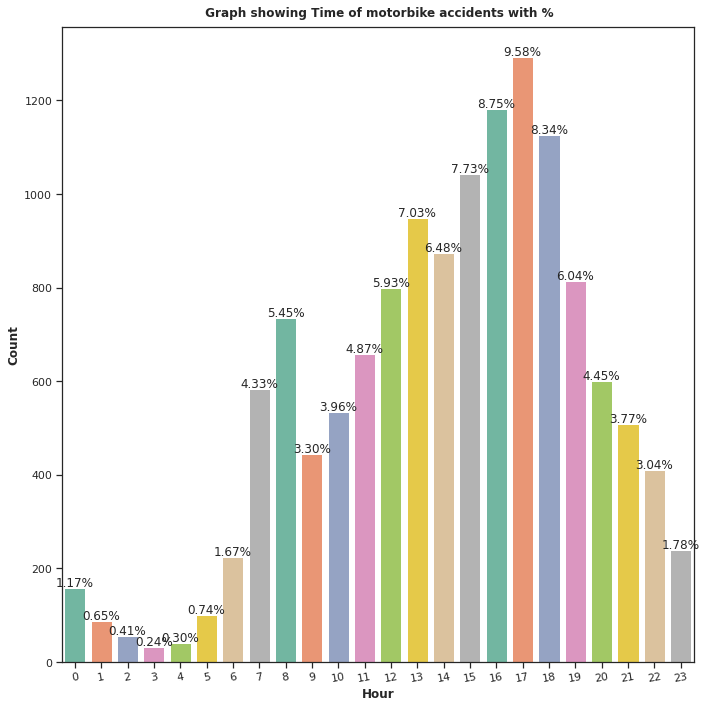

In [51]:
countplot_percentage(Motorbike_df, 'Hour', 'Time of motorbike accidents')

Counting according to days of the week

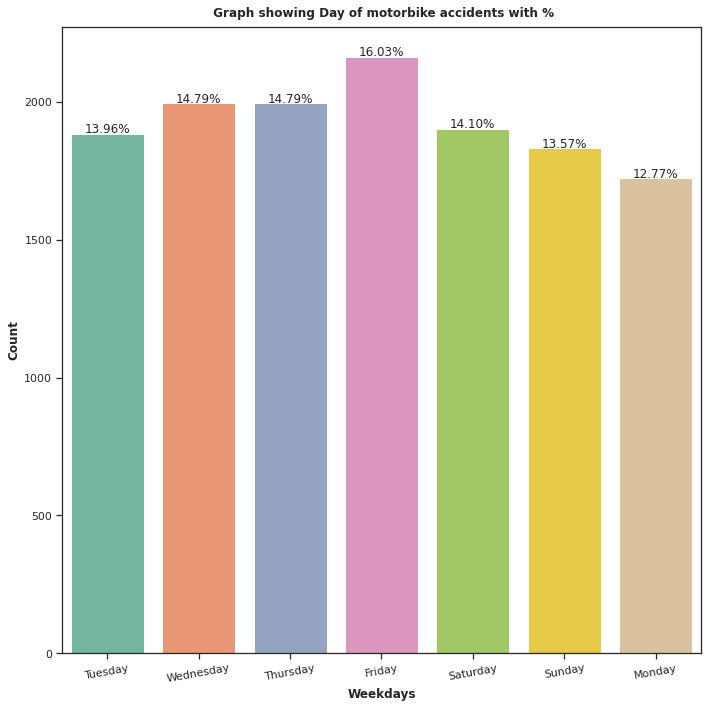

In [52]:
countplot_percentage(Motorbike_df, 'Weekdays', 'Day of motorbike accidents')

# Question c

(c)	For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?




# Explanation

Pedestrian is seen in Casualty class column and indicated by 3...Hence we create a data frame with this class alone and count (visualize) by countplot

In [53]:
pedestrian_df= combined_table[combined_table['Casualty_Class'] == 3]

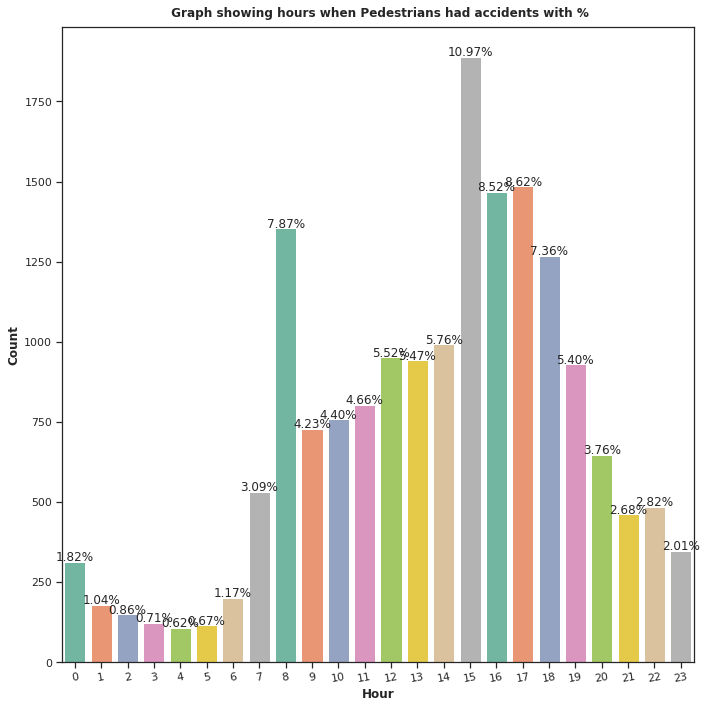

In [54]:
#Plot showing hours of the day for Pedestrian accidents
countplot_percentage(pedestrian_df, 'Hour', 'hours when Pedestrians had accidents')

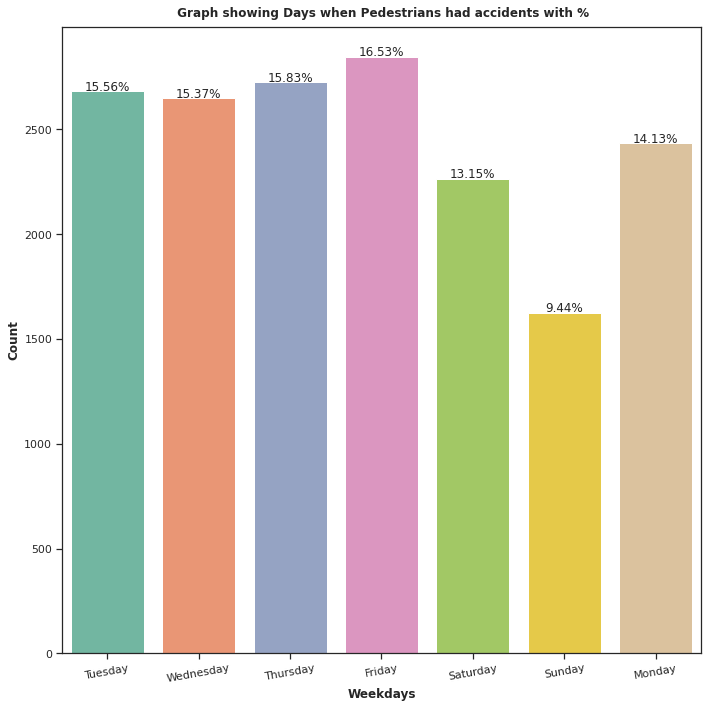

In [55]:
#Plot showing day of the week for Pedestrian accidents
countplot_percentage(pedestrian_df, 'Weekdays', 'Days when Pedestrians had accidents')

# Question D

(d)	What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?

As given by Time and Date UK. Day time savings in 2019 was from Sunday, 31 March 2019  to 27 October 2019 

Reference: https://www.timeanddate.com/time/change/uk/london?year=2019

In [56]:
combined_table

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car
3,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car
4,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210435,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,5,08:46,917,S12000006,3,7,6,60,0,-1,-1,0,0,0,Daylight,1,2,0,0,2,1,W01000474,1,1,1,1,22,5,3,0,0,0,0,0,19,1,1,4,19,0,18,0,0,0,0,0,0,3,1,1,1,20,4,2198,2,4,5,3,5,8,Thursday,Heavy Duty Truck
210436,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,917,S12000006,4,723,6,60,3,4,4,721,0,0,Daylight,1,1,0,0,2,2,W01000474,2,1,1,1,61,9,3,0,0,0,0,0,9,3,7,1,9,0,18,0,1,0,0,0,0,1,1,6,1,33,6,1997,2,12,3,2,3,15,Friday,Car
210437,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,917,S12000006,4,723,6,60,3,4,4,721,0,0,Daylight,1,1,0,0,2,2,W01000474,2,1,1,1,61,9,3,0,0,0,0,0,9,3,7,2,9,0,18,0,1,0,0,0,0,0,1,6,1,61,9,2967,2,5,7,3,7,15,Friday,Car
210438,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,7,14:10,917,S12000006,6,710,6,30,3,4,6,723,0,0,Daylight,1,1,0,0,2,2,W01000474,1,1,3,1,54,8,3,5,3,0,0,0,0,3,8,1,9,0,7,0,6,0,0,3,0,3,1,5,1,78,11,1597,2,6,8,3,8,14,Saturday,Car


Modifying the date column

Reference: https://stackoverflow.com/questions/54533328/week-number-from-given-date-in-pandas

In [57]:
# Dictionary with start and end dates of daylight savings
End_Start_DST = {'DST_Dates':["2019-03-31", '2019-10-27']}

#Changes to dataframe
DST = pd.DataFrame(End_Start_DST, index =["DST Start Date", "DST End Date"])
DST

,DST_Dates
DST Start Date,2019-03-31
DST End Date,2019-10-27


In [58]:
#Using datetime library to modify the date

DST['DST_Dates'] = pd.to_datetime(DST['DST_Dates'])
DST.astype('int64').dtypes




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


DST_Dates    int64
dtype: object

In [59]:
#Gets the start date
Week_Number = DST['DST_Dates'].dt.week
Week_Number 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


DST Start Date    13
DST End Date      43
Name: DST_Dates, dtype: int64

In [60]:
#Saving the DST start and end week dates in variables DST_Start_Week_No and DST_End_Week_No
DST_Start_Week_No = Week_Number.iloc[0]
DST_End_Week_No = Week_Number.iloc[1]

# Modifying the Date column by datetime library and also creating another column for week number

In [61]:
#CHANGHING THE DATE COLUMN TO 'DATES' IN DATETIME FORMAT
combined_table['Dates'] = pd.to_datetime(combined_table['Date'])
combined_table['Dates'].astype('int64').dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


dtype('int64')

In [62]:
combined_table.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name,Dates
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18
3,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18
4,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18


In [63]:
#FUNCTION TO EXTRACT WEEK NUMBER FROM THE DATE
combined_table['Week'] = combined_table['Dates'].dt.weekofyear #creates a column fo week
week_of_year = []
year_weeks = range(1,53)
weekly_accident_count =[]
for i in year_weeks:
    x = combined_table[combined_table['Week'] == i]
    y =len(x)
    weekly_accident_count.append(y)

for i in year_weeks:
    week_of_year.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [64]:
combined_table

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name,Dates,Week
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8
3,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8
4,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210435,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,5,08:46,917,S12000006,3,7,6,60,0,-1,-1,0,0,0,Daylight,1,2,0,0,2,1,W01000474,1,1,1,1,22,5,3,0,0,0,0,0,19,1,1,4,19,0,18,0,0,0,0,0,0,3,1,1,1,20,4,2198,2,4,5,3,5,8,Thursday,Heavy Duty Truck,2019-05-30,22
210436,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,917,S12000006,4,723,6,60,3,4,4,721,0,0,Daylight,1,1,0,0,2,2,W01000474,2,1,1,1,61,9,3,0,0,0,0,0,9,3,7,1,9,0,18,0,1,0,0,0,0,1,1,6,1,33,6,1997,2,12,3,2,3,15,Friday,Car,2019-06-21,25
210437,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,917,S12000006,4,723,6,60,3,4,4,721,0,0,Daylight,1,1,0,0,2,2,W01000474,2,1,1,1,61,9,3,0,0,0,0,0,9,3,7,2,9,0,18,0,1,0,0,0,0,0,1,6,1,61,9,2967,2,5,7,3,7,15,Friday,Car,2019-06-21,25
210438,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,7,14:10,917,S12000006,6,710,6,30,3,4,6,723,0,0,Daylight,1,1,

# Ploting the week numbers and specifying DTS weeks

Text(0, 0.5, 'Number of accidents')

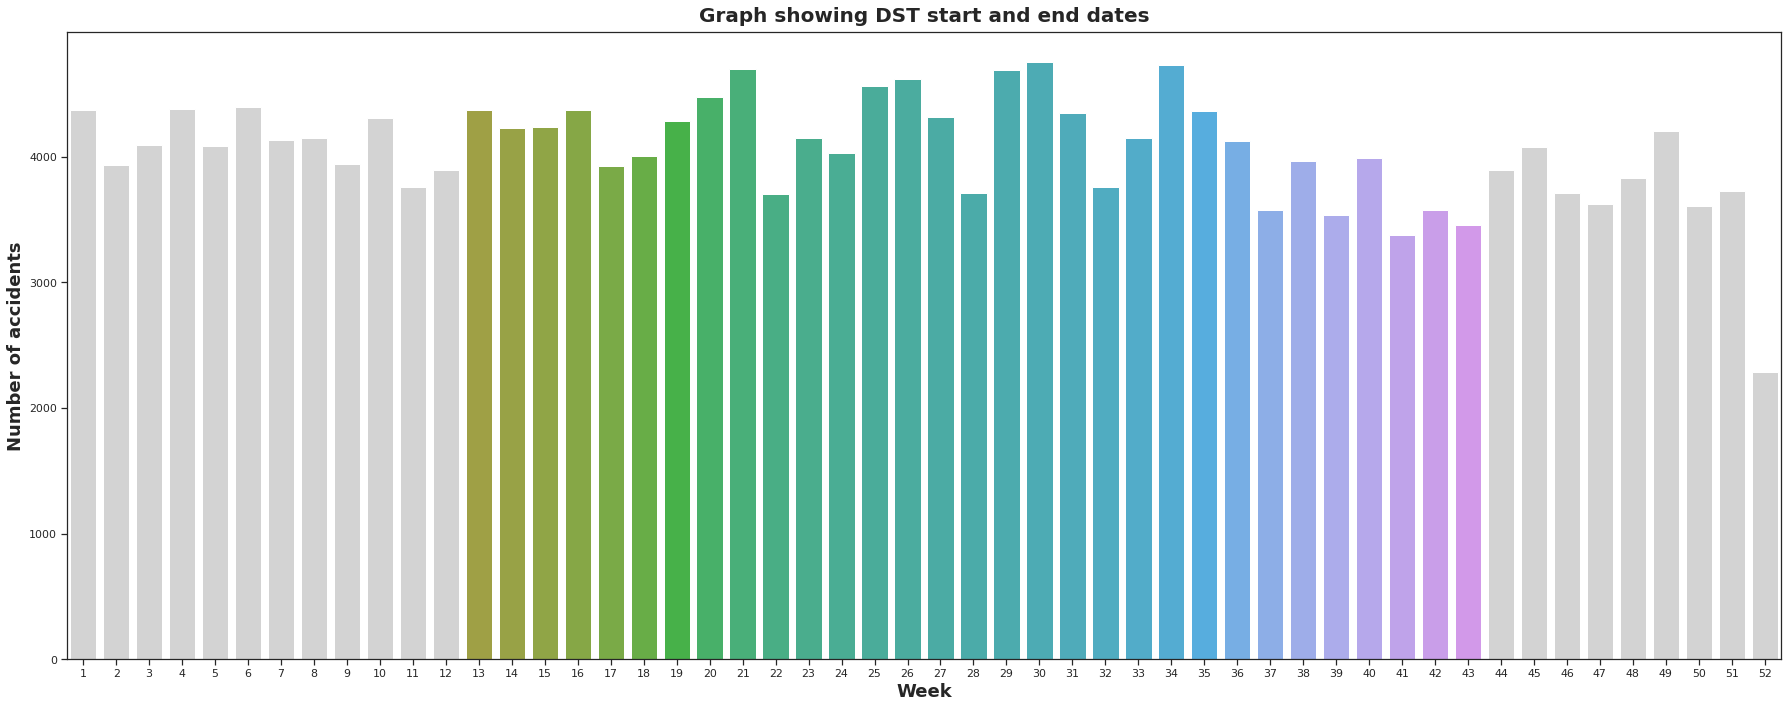

In [65]:
plt.figure(figsize = (25,10))
ax = sns.countplot(x="Week", data=combined_table)
ax.set_title('Graph showing DST start and end dates', fontsize = 20)
for p in ax.patches:
    if not(11 <= p.get_x() < 42):
        p.set_facecolor('lightgrey')
plt.xlabel("Week",fontsize=18)
plt.ylabel("Number of accidents", fontsize=18)

# Getting the graphs for month

In [66]:
combined_table['Month'] =  combined_table['Dates'].apply (lambda row: row.month)                                                                                               

In [67]:
#confirms if the month column has been created
combined_table.head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name,Dates,Week,Month
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2


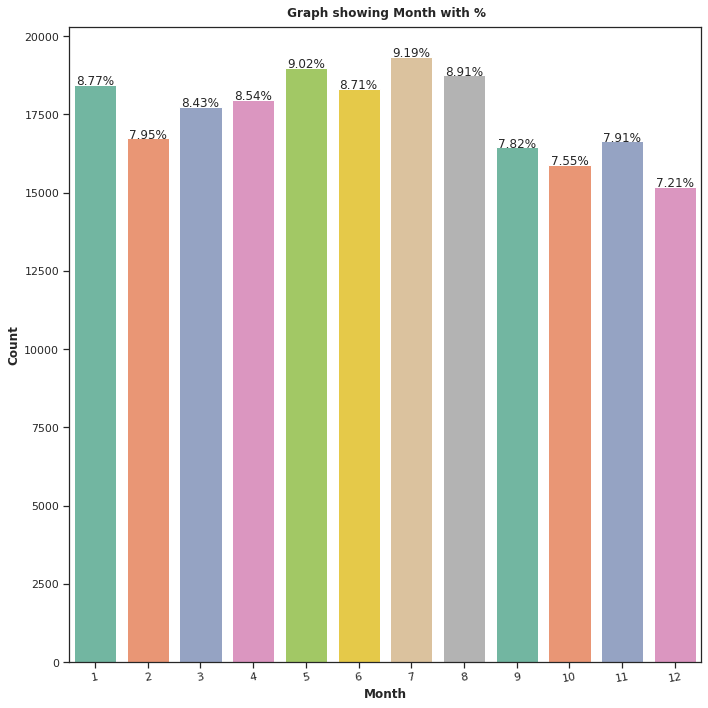

In [68]:
countplot_percentage(combined_table, 'Month', 'Month')

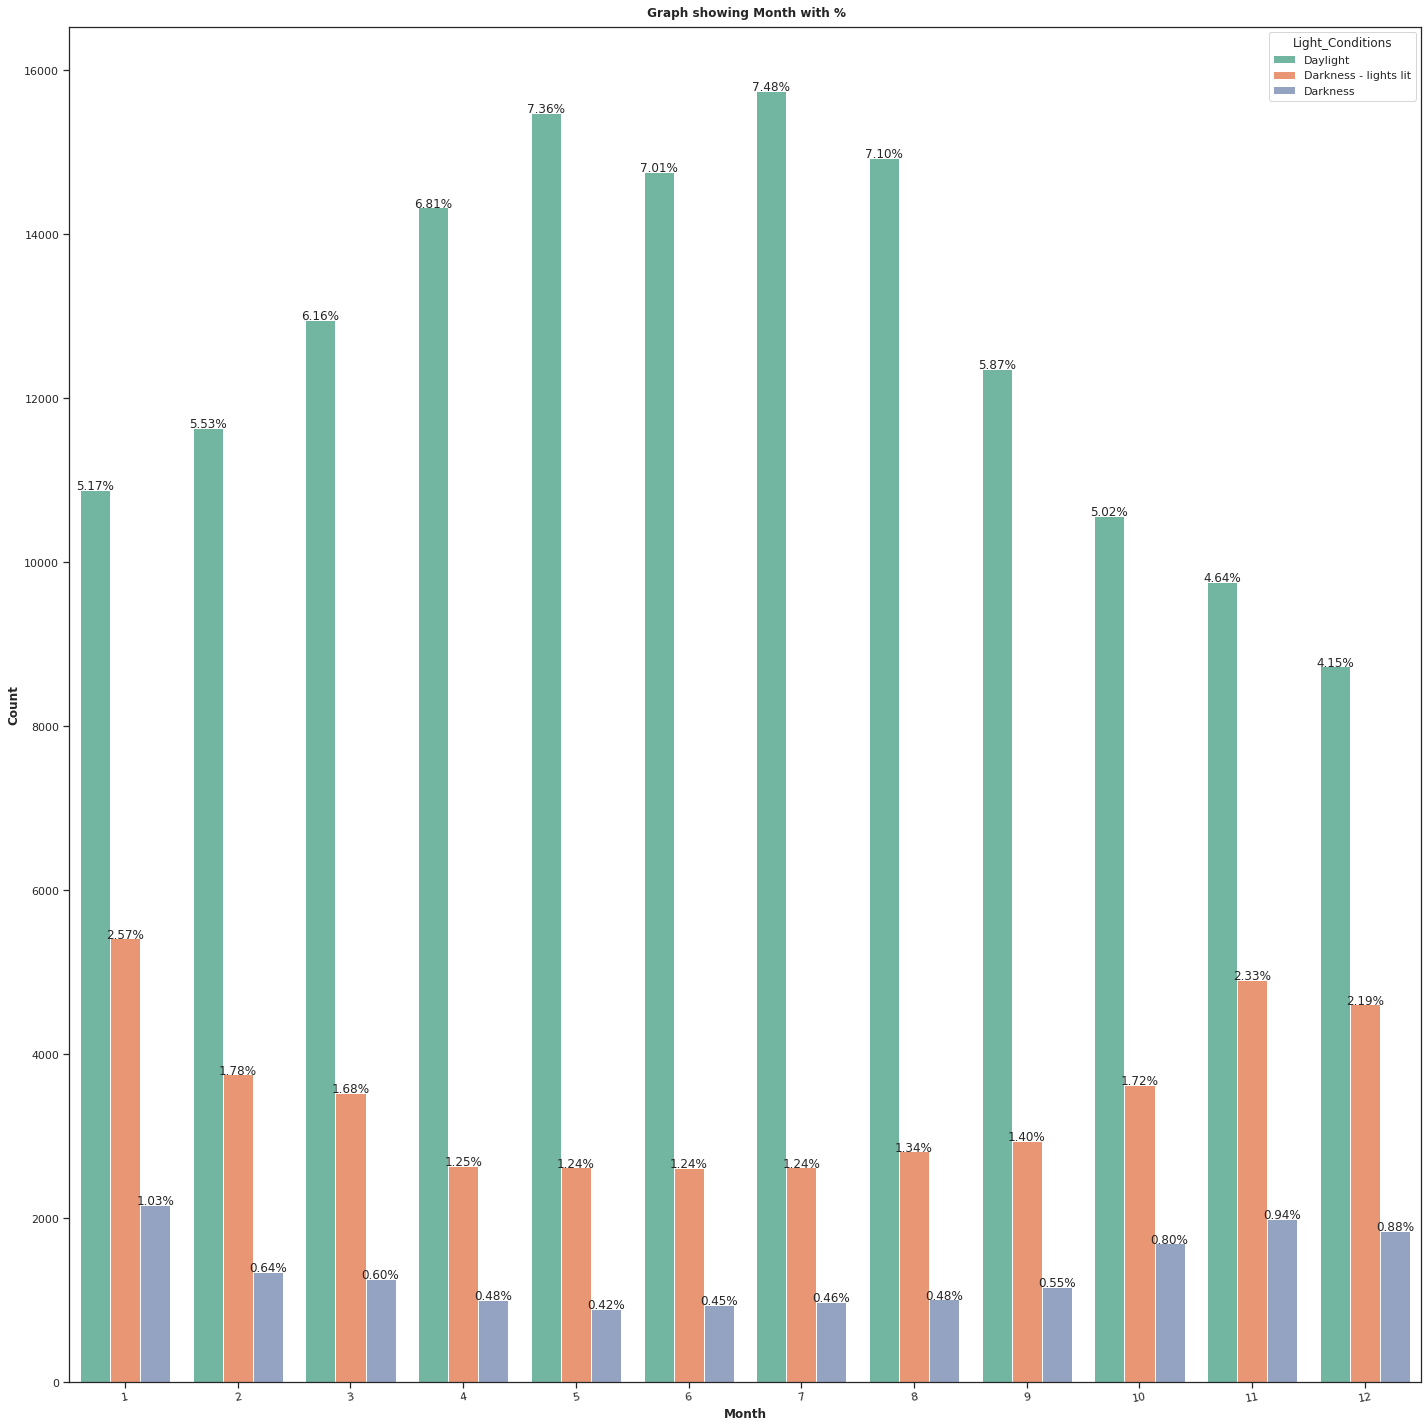

In [69]:
countplot_percentage_with_conditions(combined_table, 'Month', 'Month')

# Question e

(e)	What impact, if any, does sunrise and sunset times have on road traffic accidents?

I had to import some libaries in python to be able to get the sunrise and sunset times for 2019 in Uk. Using the latitude and longitude of Uk provided by https://www.latlong.net/place/london-the-uk-14153.html

In [70]:
!pip install sunriset
!pip install astral
!pip install suntime
!pip install suntimes


In [71]:
import pytz
import time
import sunriset
import astral, astral.sun
from suntime import Sun, SunTimeException
from suntimes import SunTimes
from datetime import date, datetime, timezone, timedelta

latitude = 51.509865 #reference #https://www.latlong.net/place/london-the-uk-14153.html
longitude = -0.118092 ##reference #https://www.latlong.net/place/london-the-uk-14153.html
altitude = 0
tz_uk = pytz.timezone('Europe/London')
tz_name = 'Europe/London'
the_date = date(2019, 1, 1)

years_number = 1
start_date = the_date
timezone_df = sunriset.to_pandas(start_date, latitude, longitude, 2, years_number)

In [72]:
timezone_df.head()

,Julian Day,Julian Century,Solar Geometric Mean Longitude,Solar Geometric Mean Anomaly,Eccentricity Earth Orbit,Solar Equation of Center,Solar True Longitude,Solar True Anomaly,Solar Radius Vector AUs,Solar Apparent Longitude,Mean Obliquity of Ecliptic,Obliquity Correction Degrees,Solar Accent Return,Solar Decline,Var Y,Equation Of Time Min,Hour Angle Sunrise,Solar Noon (float),Sunrise (float),Sunset (float),Solar Noon,Sunrise,Sunset,Sunlight Durration (minutes),Ture Solar Time,Hour Angle Deg,Solar Zenith Angle (degrees),Solar Elevation Angle (degrees),Approximate Atmospheric Refraction (degrees),Solar Elevation Corrected ATM Refraction (degrees),Solar Azimuth Angle (degrees cw from North)
2019-01-01,2.458485e+06,0.190005,280.777013,7197.512926,0.016701,-0.084812,280.692201,7197.428114,0.983317,280.682273,23.436820,23.435636,168.382365,-23.005921,0.043021,-3.401454,59.429196,0.586023,0.420942,0.751105,0 days 14:03:52.429326,0 days 10:06:09.422266,0 days 18:01:35.436386,475.433569,596.126178,-30.968456,79.320825,10.679175,0.082784,10.761958,151.184696
2019-01-02,2.458486e+06,0.190032,281.762661,7198.498527,0.016701,-0.051213,281.711448,7198.447314,0.983306,281.701518,23.436820,23.435638,167.279294,-22.920471,0.043021,-3.870157,59.575240,0.586349,0.420862,0.751836,0 days 14:04:20.551519,0 days 10:06:02.494024,0 days 18:02:38.609014,476.601916,595.657475,-31.085631,79.275282,10.724718,0.082447,10.807165,151.052521
2019-01-03,2.458487e+06,0.190059,282.748308,7199.484127,0.016701,-0.017597,282.730710,7199.466529,0.983301,282.720778,23.436820,23.435640,166.177658,-22.827412,0.043021,-4.333244,59.733835,0.586671,0.420743,0.752598,0 days 14:04:48.336744,0 days 10:05:52.216328,0 days 18:03:44.457160,477.870681,595.194388,-31.201403,79.222307,10.777693,0.082059,10.859752,150.918906
2019-01-04,2.458488e+06,0.190087,283.733955,7200.469727,0.016701,0.016023,283.749979,7200.485750,0.983301,283.740044,23.436819,23.435642,165.077582,-22.726789,0.043021,-4.790223,59.904795,0.586988,0.420586,0.753390,0 days 14:05:15.755433,0 days 10:05:38.604648,0 days 18:04:52.906218,479.238360,594.737409,-31.315648,79.161912,10.838088,0.081620,10.919709,150.783950
2019-01-05,2.458489e+06,0.190114,284.719603,7201.455327,0.016701,0.049639,284.769242,7201.504967,0.983306,284.759305,23.436819,23.435643,163.979189,-22.618652,0.043021,-5.240610,60.087919,0.587301,0.420390,0.754212,0 days 14:05:42.778653,0 days 10:05:21.678013,0 days 18:06:03.879293,480.703355,594.287022,-31.428244,79.094108,10.905892,0.081133,10.987026,150.647750


Creating a date column for the time zone dataframe

In [73]:
timezone_df['Dates']=timezone_df.index

In [74]:
#confirms the Dates column
timezone_df.head(2)

,Julian Day,Julian Century,Solar Geometric Mean Longitude,Solar Geometric Mean Anomaly,Eccentricity Earth Orbit,Solar Equation of Center,Solar True Longitude,Solar True Anomaly,Solar Radius Vector AUs,Solar Apparent Longitude,Mean Obliquity of Ecliptic,Obliquity Correction Degrees,Solar Accent Return,Solar Decline,Var Y,Equation Of Time Min,Hour Angle Sunrise,Solar Noon (float),Sunrise (float),Sunset (float),Solar Noon,Sunrise,Sunset,Sunlight Durration (minutes),Ture Solar Time,Hour Angle Deg,Solar Zenith Angle (degrees),Solar Elevation Angle (degrees),Approximate Atmospheric Refraction (degrees),Solar Elevation Corrected ATM Refraction (degrees),Solar Azimuth Angle (degrees cw from North),Dates
2019-01-01,2.458485e+06,0.190005,280.777013,7197.512926,0.016701,-0.084812,280.692201,7197.428114,0.983317,280.682273,23.43682,23.435636,168.382365,-23.005921,0.043021,-3.401454,59.429196,0.586023,0.420942,0.751105,0 days 14:03:52.429326,0 days 10:06:09.422266,0 days 18:01:35.436386,475.433569,596.126178,-30.968456,79.320825,10.679175,0.082784,10.761958,151.184696,2019-01-01
2019-01-02,2.458486e+06,0.190032,281.762661,7198.498527,0.016701,-0.051213,281.711448,7198.447314,0.983306,281.701518,23.43682,23.435638,167.279294,-22.920471,0.043021,-3.870157,59.575240,0.586349,0.420862,0.751836,0 days 14:04:20.551519,0 days 10:06:02.494024,0 days 18:02:38.609014,476.601916,595.657475,-31.085631,79.275282,10.724718,0.082447,10.807165,151.052521,2019-01-02


In [75]:
#Creating a new dataframe that will be merged with the combine dataframe
#These columnns are the only attributes needed
New_Time_zone = timezone_df[['Dates','Sunrise','Sunset'] ]

In [76]:
New_Time_zone.head(3)

,Dates,Sunrise,Sunset
2019-01-01,2019-01-01,0 days 10:06:09.422266,0 days 18:01:35.436386
2019-01-02,2019-01-02,0 days 10:06:02.494024,0 days 18:02:38.609014
2019-01-03,2019-01-03,0 days 10:05:52.216328,0 days 18:03:44.457160


In [77]:
#resets the index to numbers and prints the the first 3 rows to confirm
New_Time_zone.reset_index().head(3)

,index,Dates,Sunrise,Sunset
0,2019-01-01,2019-01-01,0 days 10:06:09.422266,0 days 18:01:35.436386
1,2019-01-02,2019-01-02,0 days 10:06:02.494024,0 days 18:02:38.609014
2,2019-01-03,2019-01-03,0 days 10:05:52.216328,0 days 18:03:44.457160


In [78]:
#Changing the timedelta columns to strings to allow slicing
New_Time_zone['Sunrise'] = New_Time_zone['Sunrise'].astype(str)
New_Time_zone['Sunset'] = New_Time_zone['Sunset'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
# function to get the sunset and sunrise
def time_slicer(string):
    value=string[7:12]
    return (value)
#using the lambda function to apply the function to the dataframe
New_Time_zone['New Sunrise'] = New_Time_zone['Sunrise'].apply(lambda x: time_slicer(x))
New_Time_zone['New Sunset'] = New_Time_zone['Sunset'].apply(lambda x: time_slicer(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [80]:
New_Time_zone.head()

,Dates,Sunrise,Sunset,New Sunrise,New Sunset
2019-01-01,2019-01-01,0 days 10:06:09.422266,0 days 18:01:35.436386,10:06,18:01
2019-01-02,2019-01-02,0 days 10:06:02.494024,0 days 18:02:38.609014,10:06,18:02
2019-01-03,2019-01-03,0 days 10:05:52.216328,0 days 18:03:44.457160,10:05,18:03
2019-01-04,2019-01-04,0 days 10:05:38.604648,0 days 18:04:52.906218,10:05,18:04
2019-01-05,2019-01-05,0 days 10:05:21.678013,0 days 18:06:03.879293,10:05,18:06


In [81]:
# #Using datetime library to modify the date

New_Time_zone['Dates'] = pd.to_datetime(New_Time_zone['Dates'])
# DST.astype('int64').dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
#Getting a combined dataframe for sunrise and sunset analysis: merging combined_table with New_Time_zone on the Dates attribute

Sunriset_combined = pd.merge(combined_table, New_Time_zone,   on=['Dates'], how='inner') 
Sunriset_combined.shape

(210440, 79)

In [83]:
Sunriset_combined.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name,Dates,Week,Month,Sunrise,Sunset,New Sunrise,New Sunset
210435,2019970915520,251935.0,667217.0,-4.368184,55.875286,97,3,2,1,31/12/2019,3,14:45,935,S12000038,6,0,3,30,5,4,6,0,0,0,Daylight,1,1,0,0,1,2,W01000474,2,1,1,1,59,9,3,0,0,0,0,0,1,-1,-1,1,9,0,5,0,8,0,0,0,0,1,1,6,1,49,8,1969,1,-1,5,1,5,14,Tuesday,Car,2019-12-31,1,12,0 days 10:06:13.518769,0 days 18:00:20.349588,10:06,18:00
210436,2019970915520,251935.0,667217.0,-4.368184,55.875286,97,3,2,1,31/12/2019,3,14:45,935,S12000038,6,0,3,30,5,4,6,0,0,0,Daylight,1,1,0,0,1,2,W01000474,2,1,1,1,59,9,3,0,0,0,0,0,1,-1,-1,2,1,0,18,0,1,0,0,0,0,4,1,6,1,59,9,-1,-1,-1,5,1,5,14,Tuesday,Bicycle and scooter,2019-12-31,1,12,0 days 10:06:13.518769,0 days 18:00:20.349588,10:06,18:00
210437,2019970918160,257146.0,665860.0,-4.284253,55.864677,97,2,1,2,31/12/2019,3,17:00,926,S12000043,6,0,6,30,3,2,6,0,0,4,Darkness - lights lit,1,1,0,0,1,1,W01000474,1,1,3,2,59,9,2,1,1,0,0,0,0,-1,-1,1,11,0,5,0,1,0,0,0,0,1,1,1,1,72,10,7300,2,14,-1,-1,-1,17,Tuesday,Bus,2019-12-31,1,12,0 days 10:06:13.518769,0 days 18:00:20.349588,10:06,18:00
210438,2019970918160,257146.0,665860.0,-4.284253,55.864677,97,2,1,2,31/12/2019,3,17:00,926,S12000043,6,0,6,30,3,2,6,0,0,4,Darkness - lights lit,1,1,0,0,1,1,W01000474,1,2,3,1,61,9,3,1,1,0,0,0,0,-1,-1,1,11,0,5,0,1,0,0,0,0,1,1,1,1,72,10,7300,2,14,-1,-1,-1,17,Tuesday,Bus,2019-12-31,1,12,0 days 10:06:13.518769,0 days 18:00:20.349588,10:06,18:00
210439,2019980938595,297884.0,560228.0,-3.594977,54.926262,98,2,1,1,31/12/2019,3,23:42,917,S12000006,3,710,6,60,3,4,6,0,0,0,Darkness - lights lit,1,1,0,0,2,1,W01000474,1,1,2,2,24,5,2,0,0,1,0,0,9,2,1,1,9,0,18,0,2,1,0,1,0,1,1,6,1,32,6,1796,1,16,2,3,2,23,Tuesday,Car,2019-12-31,1,12,0 days 10:06:13.518769,0 days 18:00:20.349588,10:06,18:00


Converting the sunrise and sunset times to minutes

In [84]:
def sunriset_to_demimal(string):
    value1=string[0:2]
    value2=string[3:5]
    return ((int(value1)+(int(value2)/60)))

Sunriset_combined['Sunrise Decimal'] = Sunriset_combined['New Sunrise'].apply(lambda x: sunriset_to_demimal(x))
Sunriset_combined['Sunset Decimal'] = Sunriset_combined['New Sunset'].apply(lambda x: sunriset_to_demimal(x))

In [85]:
Sunriset_combined.tail(3)# to verify

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name,Dates,Week,Month,Sunrise,Sunset,New Sunrise,New Sunset,Sunrise Decimal,Sunset Decimal
210437,2019970918160,257146.0,665860.0,-4.284253,55.864677,97,2,1,2,31/12/2019,3,17:00,926,S12000043,6,0,6,30,3,2,6,0,0,4,Darkness - lights lit,1,1,0,0,1,1,W01000474,1,1,3,2,59,9,2,1,1,0,0,0,0,-1,-1,1,11,0,5,0,1,0,0,0,0,1,1,1,1,72,10,7300,2,14,-1,-1,-1,17,Tuesday,Bus,2019-12-31,1,12,0 days 10:06:13.518769,0 days 18:00:20.349588,10:06,18:00,10.1,18.0
210438,2019970918160,257146.0,665860.0,-4.284253,55.864677,97,2,1,2,31/12/2019,3,17:00,926,S12000043,6,0,6,30,3,2,6,0,0,4,Darkness - lights lit,1,1,0,0,1,1,W01000474,1,2,3,1,61,9,3,1,1,0,0,0,0,-1,-1,1,11,0,5,0,1,0,0,0,0,1,1,1,1,72,10,7300,2,14,-1,-1,-1,17,Tuesday,Bus,2019-12-31,1,12,0 days 10:06:13.518769,0 days 18:00:20.349588,10:06,18:00,10.1,18.0
210439,2019980938595,297884.0,560228.0,-3.594977,54.926262,98,2,1,1,31/12/2019,3,23:42,917,S12000006,3,710,6,60,3,4,6,0,0,0,Darkness - lights lit,1,1,0,0,2,1,W01000474,1,1,2,2,24,5,2,0,0,1,0,0,9,2,1,1,9,0,18,0,2,1,0,1,0,1,1,6,1,32,6,1796,1,16,2,3,2,23,Tuesday,Car,2019-12-31,1,12,0 days 10:06:13.518769,0 days 18:00:20.349588,10:06,18:00,10.1,18.0


Plotting Distribution plot showing time between sunrise and sunset with accident

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


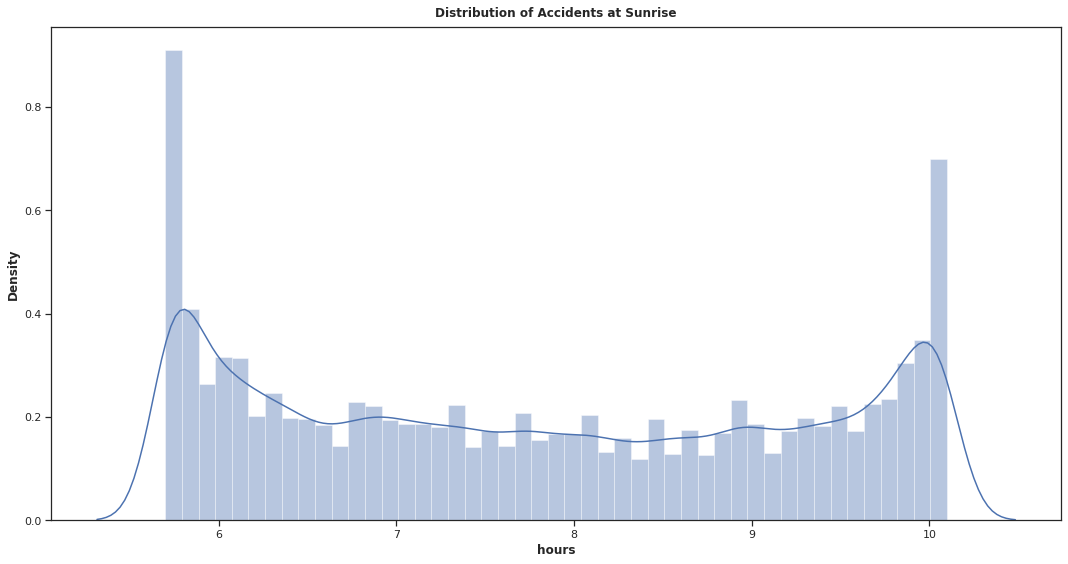

In [86]:
fig = plt.figure(figsize=(15,8))
ax = sns.distplot(Sunriset_combined['Sunrise Decimal'])
ax.set(xlabel='hours', ylabel='Density', title='Distribution of Accidents at Sunrise')
plt.show()

Plotting Distribution of accidents at sunset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


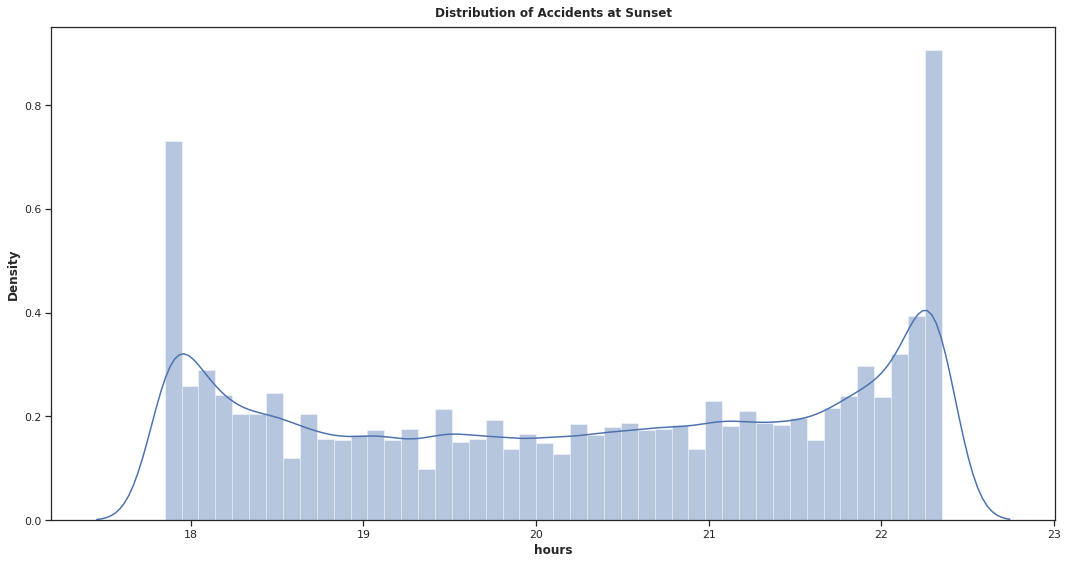

In [87]:
fig = plt.figure(figsize=(15,8))
ax = sns.distplot(Sunriset_combined['Sunset Decimal'])
ax.set(xlabel='hours', ylabel='Density', title='Distribution of Accidents at Sunset')
plt.show()

# Question f

(f)	Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?

This question was addressed using the vehicle dataframe. This is because the dataframe gives the unique vehicle involved in the accident.... (with the vehicle reference).

# i. Engine Capacity: 

Theory of engine capacity was read in the link below

Reference: https://www.cjponyparts.com/resources/engine-size-chart

In [88]:
df_vehicles['Engine_Capacity_(CC)'].mode()

0   -1
dtype: int64

In [89]:
#getting the biggest engine capacity to be able to group them
df_vehicles['Engine_Capacity_(CC)'].max()

29980

Gouping and creating a column for engine capacity using lamda and comprehension

In [90]:
df_vehicles['Grouping_Enginecapacity'] =  df_vehicles['Engine_Capacity_(CC)'].apply (lambda x: 'Unknown' if x==-1 else ('2000cc and below' if x >-1 and x <=3000 else 
                                                                                                ('3001 - 6000cc' if x >3000 and x <=6000 else
                                                                                                ('6001 - 9000cc' if x >6000 and x <=9000 else 
                                                                                                ('9001 - 12000cc' if x >9000 and x <=12000 else 
                                                                                                ('12001 - 15000cc' if x>12000 and x <=15000 else
                                                                                                ('15001 - 18000cc' if x >15000 and x <=18000 else
                                                                                                ('18001 - 21000cc' if x >18000 and x <=21000 else
                                                                                                ('21001 - 24000cc' if x >21000 and x <=24000 else
                                                                                                ('24001 - 27000cc' if x >24000 and x <=27000 else
                                                                                                ('270001 - 30000cc' if x >27000 and x <=30000 else x)))))))))))

Creating the same column in the combine dataframe

In [91]:
combined_table['Grouping_Enginecapacity'] =  combined_table['Engine_Capacity_(CC)'].apply (lambda x: 'Unknown' if x==-1 else ('2000cc and below' if x >-1 and x <=3000 else 
                                                                                                ('3001 - 6000cc' if x >3000 and x <=6000 else
                                                                                                ('6001 - 9000cc' if x >6000 and x <=9000 else 
                                                                                                ('9001 - 12000cc' if x >9000 and x <=12000 else 
                                                                                                ('12001 - 15000cc' if x>12000 and x <=15000 else
                                                                                                ('15001 - 18000cc' if x >15000 and x <=18000 else
                                                                                                ('18001 - 21000cc' if x >18000 and x <=21000 else
                                                                                                ('21001 - 24000cc' if x >21000 and x <=24000 else
                                                                                                ('24001 - 27000cc' if x >24000 and x <=27000 else
                                                                                                ('270001 - 30000cc' if x >27000 and x <=30000 else x)))))))))))

In [92]:
df_vehicles #confirming

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Grouping_Enginecapacity
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,Unknown
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,Unknown
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3,Unknown
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,6,1,6,Unknown
4,2019010155191,1,9,0,3,0,1,0,0,0,0,2,1,6,1,45,7,-1,-1,-1,4,1,4,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,4,19,0,18,0,0,0,0,0,0,3,1,1,1,20,4,2198,2,4,5,3,5,2000cc and below
216377,2019984107219,1,9,0,18,0,1,0,0,0,0,1,1,6,1,33,6,1997,2,12,3,2,3,2000cc and below
216378,2019984107219,2,9,0,18,0,1,0,0,0,0,0,1,6,1,61,9,2967,2,5,7,3,7,2000cc and below
216379,2019984107419,1,9,0,7,0,6,0,0,3,0,3,1,5,1,78,11,1597,2,6,8,3,8,2000cc and below


Plotting the count of accidents with engine capacities

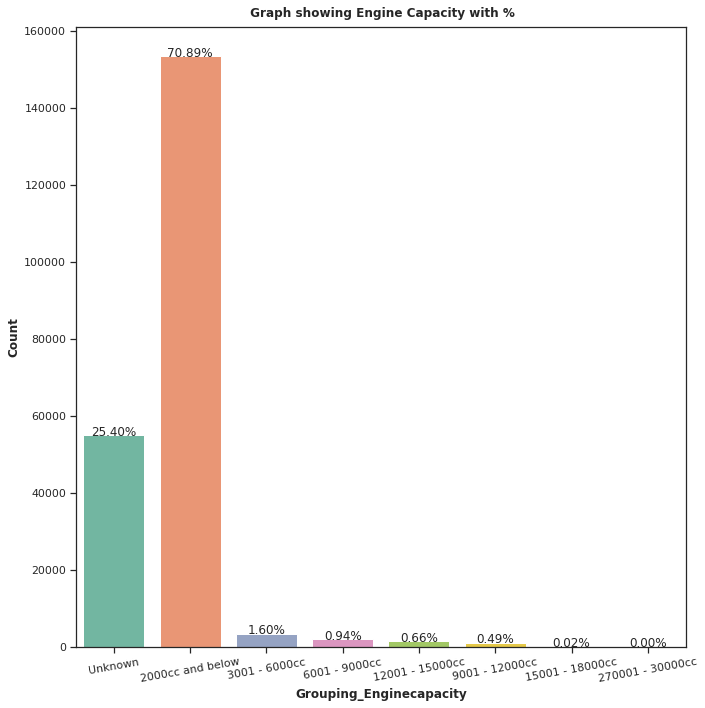

In [93]:
countplot_percentage(df_vehicles, 'Grouping_Enginecapacity', 'Engine Capacity')

# ii. Age of Vehicle

Grouping into age brackets and simultaneosly creating a column for it

In [94]:
df_vehicles['Vehicle_Age_Band'] =  df_vehicles['Age_of_Vehicle'].apply (lambda x: 'Unknown' if x==-1 else ('0-5' if x >-1 and x <=5 else 
                                                                                                ('6-10' if x >5 and x <=10 else
                                                                                                ('11-15' if x >10 and x <=15 else 
                                                                                                ('16-20' if x >15 and x <=20 else 
                                                                                                ('21-25' if x>20 and x <=25 else
                                                                                                ('26-30' if x >25 and x <=30 else
                                                                                                ('31-35' if x >30 and x <=35 else
                                                                                                ('36-40' if x >35 and x <=40 else
                                                                                                ('41-45' if x >40 and x <=45 else
                                                                                                ('46-50' if x >45 and x <=50 else
                                                                                                ('51-55' if x >50 and x <=55 else
                                                                                                ('56-60' if x >55 and x <=60 else
                                                                                                ('61-65' if x >60 and x <=65 else
                                                                                                ('66-70' if x >65 and x <=70 else
                                                                                                ('71-75' if x >70 and x <=75 else
                                                                                                ('76-80' if x >75 and x <=80 else
                                                                                                ('81-85' if x >80 and x <=85 else
                                                                                                ('86-90' if x >85 and x <=90 else
                                                                                                ('91-95' if x >90 and x <=95 else
                                                                                                ('96-100'if x >95 and x <=100 else x)))))))))))))))))))))


Creating the same column in the combine dataframe

In [95]:
combined_table['Vehicle_Age_Band'] =  combined_table['Age_of_Vehicle'].apply (lambda x: 'Unknown' if x==-1 else ('0-5' if x >-1 and x <=5 else 
                                                                                                ('6-10' if x >5 and x <=10 else
                                                                                                ('11-15' if x >10 and x <=15 else 
                                                                                                ('16-20' if x >15 and x <=20 else 
                                                                                                ('21-25' if x>20 and x <=25 else
                                                                                                ('26-30' if x >25 and x <=30 else
                                                                                                ('31-35' if x >30 and x <=35 else
                                                                                                ('36-40' if x >35 and x <=40 else
                                                                                                ('41-45' if x >40 and x <=45 else
                                                                                                ('46-50' if x >45 and x <=50 else
                                                                                                ('51-55' if x >50 and x <=55 else
                                                                                                ('56-60' if x >55 and x <=60 else
                                                                                                ('61-65' if x >60 and x <=65 else
                                                                                                ('66-70' if x >65 and x <=70 else
                                                                                                ('71-75' if x >70 and x <=75 else
                                                                                                ('76-80' if x >75 and x <=80 else
                                                                                                ('81-85' if x >80 and x <=85 else
                                                                                                ('86-90' if x >85 and x <=90 else
                                                                                                ('91-95' if x >90 and x <=95 else
                                                                                                ('96-100'if x >95 and x <=100 else x)))))))))))))))))))))


In [96]:
df_vehicles

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Grouping_Enginecapacity,Vehicle_Age_Band
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,Unknown,Unknown
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,Unknown,Unknown
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3,Unknown,Unknown
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,6,1,6,Unknown,Unknown
4,2019010155191,1,9,0,3,0,1,0,0,0,0,2,1,6,1,45,7,-1,-1,-1,4,1,4,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,4,19,0,18,0,0,0,0,0,0,3,1,1,1,20,4,2198,2,4,5,3,5,2000cc and below,0-5
216377,2019984107219,1,9,0,18,0,1,0,0,0,0,1,1,6,1,33,6,1997,2,12,3,2,3,2000cc and below,11-15
216378,2019984107219,2,9,0,18,0,1,0,0,0,0,0,1,6,1,61,9,2967,2,5,7,3,7,2000cc and below,0-5
216379,2019984107419,1,9,0,7,0,6,0,0,3,0,3,1,5,1,78,11,1597,2,6,8,3,8,2000cc and below,6-10


Plotting the graph showing count of accidents with age band of vehicle

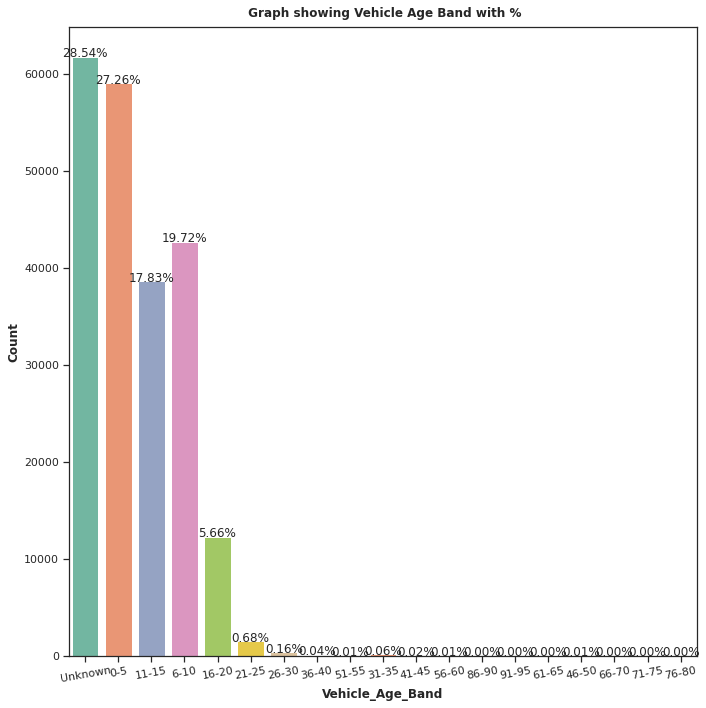

In [97]:
countplot_percentage(df_vehicles, 'Vehicle_Age_Band', 'Vehicle Age Band')

In [98]:
df_vehicles['Vehicle_Age_Band'].value_counts()

Unknown    61755
0-5        58988
6-10       42680
11-15      38576
16-20      12254
21-25       1465
26-30        341
31-35        121
36-40         83
41-45         43
56-60         23
51-55         19
46-50         15
61-65          6
86-90          4
71-75          3
66-70          2
76-80          2
91-95          1
Name: Vehicle_Age_Band, dtype: int64

In [99]:
len(df_vehicles)

216381

# iii. Vehicle Type

Creates the Actual_vehicle_name column

In [100]:
df_vehicles['Actual_vehicle_name'] =  df_vehicles['Vehicle_Type'].apply (lambda x: 'Motorbikes' if x==2 else ('Motorbikes' if x==3 else 
                                                                                                ('Motorbikes' if x==4 else 
                                                                                                ('Motorbikes' if x==5 else 
                                                                                                ('Motorbikes' if x==22 else 
                                                                                                ('Motorbikes' if x==23 else
                                                                                                ('Bicycle and scooter' if x==1 or x==22 else
                                                                                                ('Car' if x==8 or x==9 else
                                                                                                ('Bus' if x==10 or x==11 else
                                                                                                ('Heavy Duty Truck' if x==19 or x==20 or x==21 or x==98 else
                                                                                                ('Other vehicles' if x==90  or x== -1 else
                                                                                                ('Ridden horse' if x==16 else
                                                                                                ('Agricultural vehicle' if x==17 else
                                                                                                ('Tram' if x==18 else
                                                                                                ('Motorbikes' if x==97 else x)))))))))))))))

In [101]:
combined_table['Actual_vehicle_name'] =  combined_table['Vehicle_Type'].apply (lambda x: 'Motorbikes' if x==2 else ('Motorbikes' if x==3 else 
                                                                                                ('Motorbikes' if x==4 else 
                                                                                                ('Motorbikes' if x==5 else 
                                                                                                ('Motorbikes' if x==22 else 
                                                                                                ('Motorbikes' if x==23 else
                                                                                                ('Bicycle and scooter' if x==1 or x==22 else
                                                                                                ('Car' if x==8 or x==9 else
                                                                                                ('Bus' if x==10 or x==11 else
                                                                                                ('Heavy Duty Truck' if x==19 or x==20 or x==21 or x==98 else
                                                                                                ('Other vehicles' if x==90  or x== -1 else
                                                                                                ('Ridden horse' if x==16 else
                                                                                                ('Agricultural vehicle' if x==17 else
                                                                                                ('Tram' if x==18 else
                                                                                                ('Motorbikes' if x==97 else x)))))))))))))))

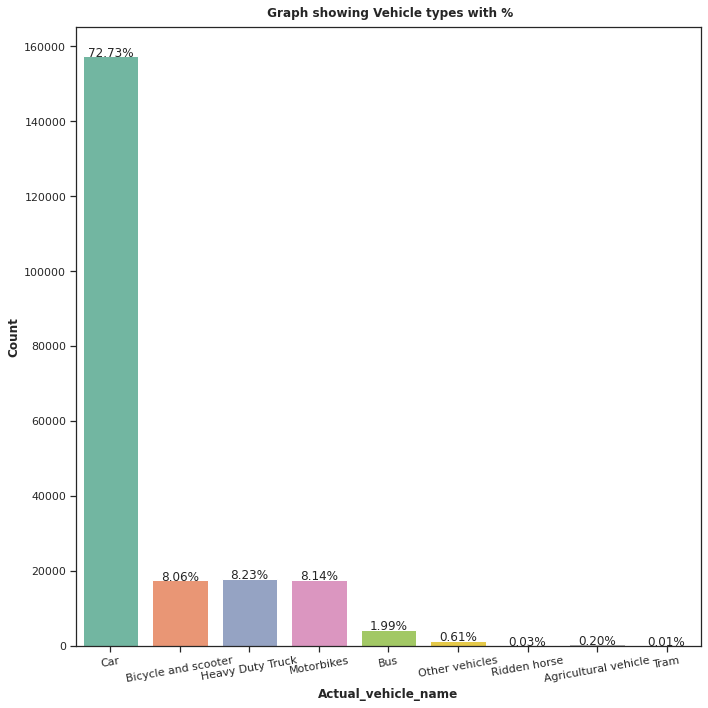

In [102]:
countplot_percentage(df_vehicles, 'Actual_vehicle_name', 'Vehicle types') # ploting

# iv. Right hand or left hand vehicle

In [103]:
#Creating a column for Right_hand_or_Left Hand'
df_vehicles['Right_hand_or_Left Hand'] =  df_vehicles['Was_Vehicle_Left_Hand_Drive?'].apply (lambda x: 'Left_hand' if x==1 else 'Right_hand' )
                                                                                               
                                                                                               

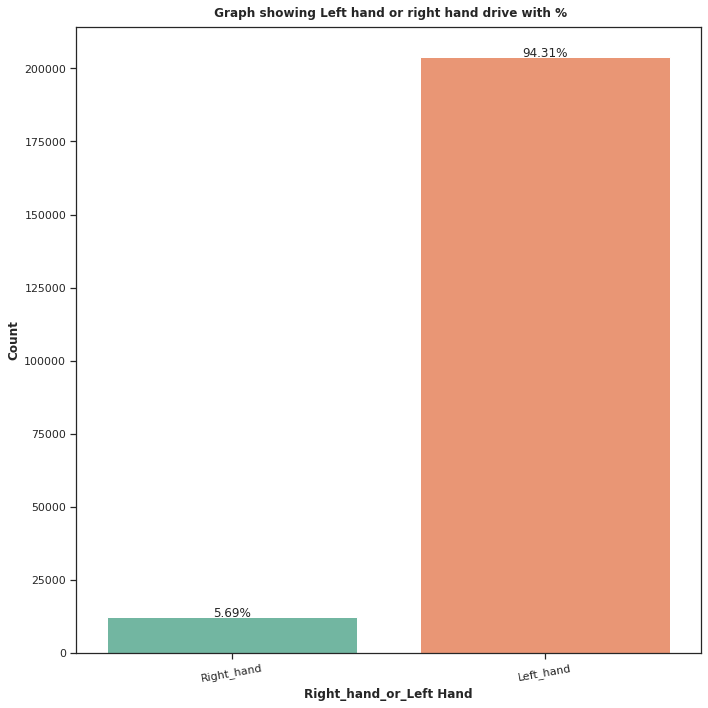

In [104]:
countplot_percentage(df_vehicles, 'Right_hand_or_Left Hand', 'Left hand or right hand drive')

# Question g

(g)	Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?


# i. Weather

Since Data missing represented by -1 are also unknown, they are they are merged as unknown

In [105]:
df_accident['Weather Conditions'] =  df_accident['Weather_Conditions'].apply (lambda x: 'Unknown' if x==-1 and x ==9 else ('Fine' if x ==1  else 
                                                                                                ('Raining' if x == 2  else
                                                                                                ('Snowing/no highwinds' if x == 3 else 
                                                                                                ('Fine/High winds' if x == 4 else 
                                                                                                ('Raining/High Winds' if x==5 else
                                                                                                ('Snowing/High_winds' if x==6 else
                                                                                                ('Fog' if x==7 else
                                                                                                ('Other' if x==8 else
                                                                                                ('Unknown' if x==9 or x==-1 else x ))))))))))
                                                                                                

In [106]:
df_accident.head(3) #confirming

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Weather Conditions
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,Fine
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,9,E09000022,3,23,2,30,0,-1,-1,0,-1,-1,Darkness - lights lit,1,1,0,0,1,3,E01003117,Fine
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,2,E09000007,4,504,6,30,3,4,6,0,0,0,Darkness - lights lit,1,1,0,0,1,1,E01000943,Fine


In [107]:
#Inserting  Weather Conditions column in the combined dataframe also... just to update the combined dataframe
combined_table['Weather Conditions'] =  combined_table['Weather_Conditions'].apply (lambda x: 'Unknown' if x==-1 and x ==9 else ('Fine' if x ==1  else 
                                                                                                ('Raining' if x == 2  else
                                                                                                ('Snowing/no highwinds' if x == 3 else 
                                                                                                ('Fine/High winds' if x == 4 else 
                                                                                                ('Raining/High Winds' if x==5 else
                                                                                                ('Snowing/High_winds' if x==6 else
                                                                                                ('Fog' if x==7 else
                                                                                                ('Other' if x==8 else
                                                                                                ('Unknown' if x==9 or x==-1 else x ))))))))))
                                                                                                

In [108]:
combined_table.head(3) #confirming

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name,Dates,Week,Month,Grouping_Enginecapacity,Vehicle_Age_Band,Weather Conditions
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine


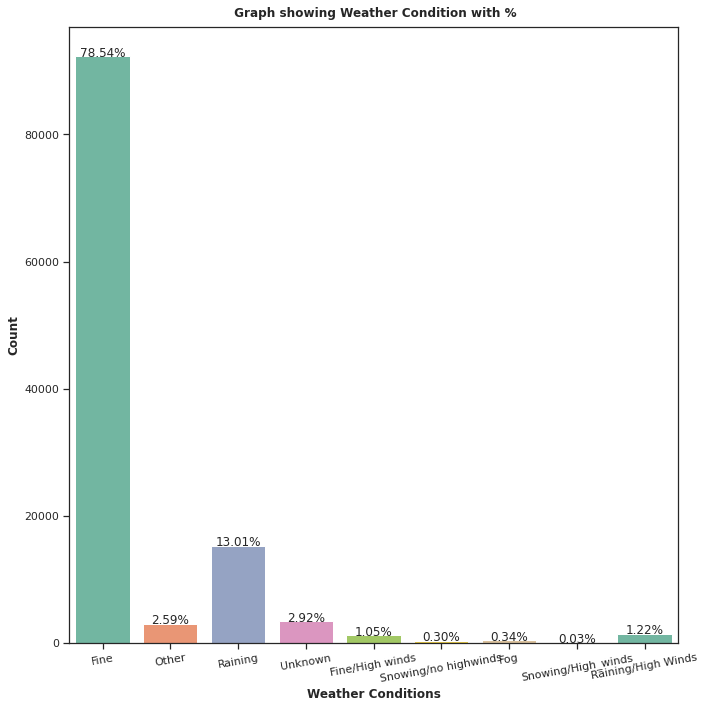

In [109]:
#plotting the graph for weather conditions
countplot_percentage(df_accident, 'Weather Conditions', 'Weather Condition')

# ii. Geographic Location

There are 98 geographic locations as indicated by the police force in the area. For the purpose of this analysis. I would be considering the top 20 geographic locations with more accidents.

In [110]:
#Data frame showing the encoded police force and the number of accidents
Number_of_accident_police_area = df_accident.groupby(['Police_Force']).size().reset_index(name='Number')
Number_of_accident_police_area

#shows a dataframe for encoded police force area with the number 
largest_policeforcearea_with_accident=df_accident['Police_Force'].value_counts().head(20)
#TURNING THE COUNTED ACCIDENTS WITH POLICE FORCE AREA TO A DATAFRAME
#First 20biggest area with accidents
First_20_Area = pd.DataFrame(largest_policeforcearea_with_accident)
First_20_Area

,Police_Force
1,25055
20,5416
46,4196
47,3991
44,3657
6,3622
13,3620
43,3564
50,3404
45,2964


Creating a function replacing the codes above with the police force area or county

In [111]:
df_accident['Police_County'] =  df_accident['Police_Force'].apply (lambda x: 'Metropolitan Police' if x==1 else ('West Midlands' if x == 20 else 
                                                                                                ('Kent' if x== 46 else
                                                                                                ('Sussex' if x ==47 else 
                                                                                                ('Hampshire' if x ==44 else 
                                                                                                ('Greater Manchester' if x==6  else
                                                                                                ('West Yorkshire' if x ==13 else
                                                                                                ('Thames Valley' if x==43 else
                                                                                                ('Devon and Cornwall' if x ==50 else
                                                                                                ('Surrey' if x ==45 else
                                                                                                ('Lancashire' if x ==4 else
                                                                                                ('Avon and Somerset' if x ==52 else
                                                                                                ('Essex' if x ==42 else
                                                                                                ('Strathclyde' if x ==97 else
                                                                                                ('South Yorkshire' if x ==14 else
                                                                                                ('Nottinghamshire' if x ==31 else
                                                                                                ('Humberside' if x ==16 else
                                                                                                ('Northumbria' if x ==10 else
                                                                                                ('Merseyside' if x ==5 else
                                                                                                ('Hertfordshire' if x ==41 else np.nan))))))))))))))))))))

In [112]:
df_accident.head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Weather Conditions,Police_County
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,Fine,Metropolitan Police
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,9,E09000022,3,23,2,30,0,-1,-1,0,-1,-1,Darkness - lights lit,1,1,0,0,1,3,E01003117,Fine,Metropolitan Police
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,2,E09000007,4,504,6,30,3,4,6,0,0,0,Darkness - lights lit,1,1,0,0,1,1,E01000943,Fine,Metropolitan Police


# Plotting the first 20 counties with largest number of the accidents  

Getting out the data frame with only the first 20 and plotting the graph

In [113]:
# plt.figure(figsize = (25,10))
# ax = sns.countplot(x="Police_County", data=df_accident)
# ax.set_title('20 counties with largest number of the accidents', fontsize = 20)
# plt.xlabel("County",fontsize=18)
# plt.ylabel("Number of accidents", fontsize=18)


#  iii. Situation

(a) Speed Limit situation

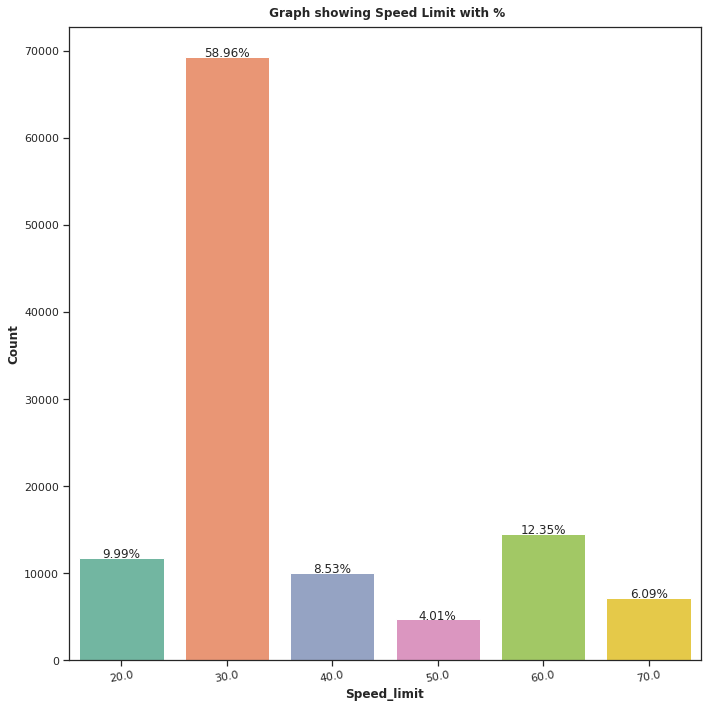

In [114]:
df_accident['Speed_limit'] = df_accident['Speed_limit'].replace(-1, np.nan)

countplot_percentage(df_accident, 'Speed_limit', 'Speed Limit')

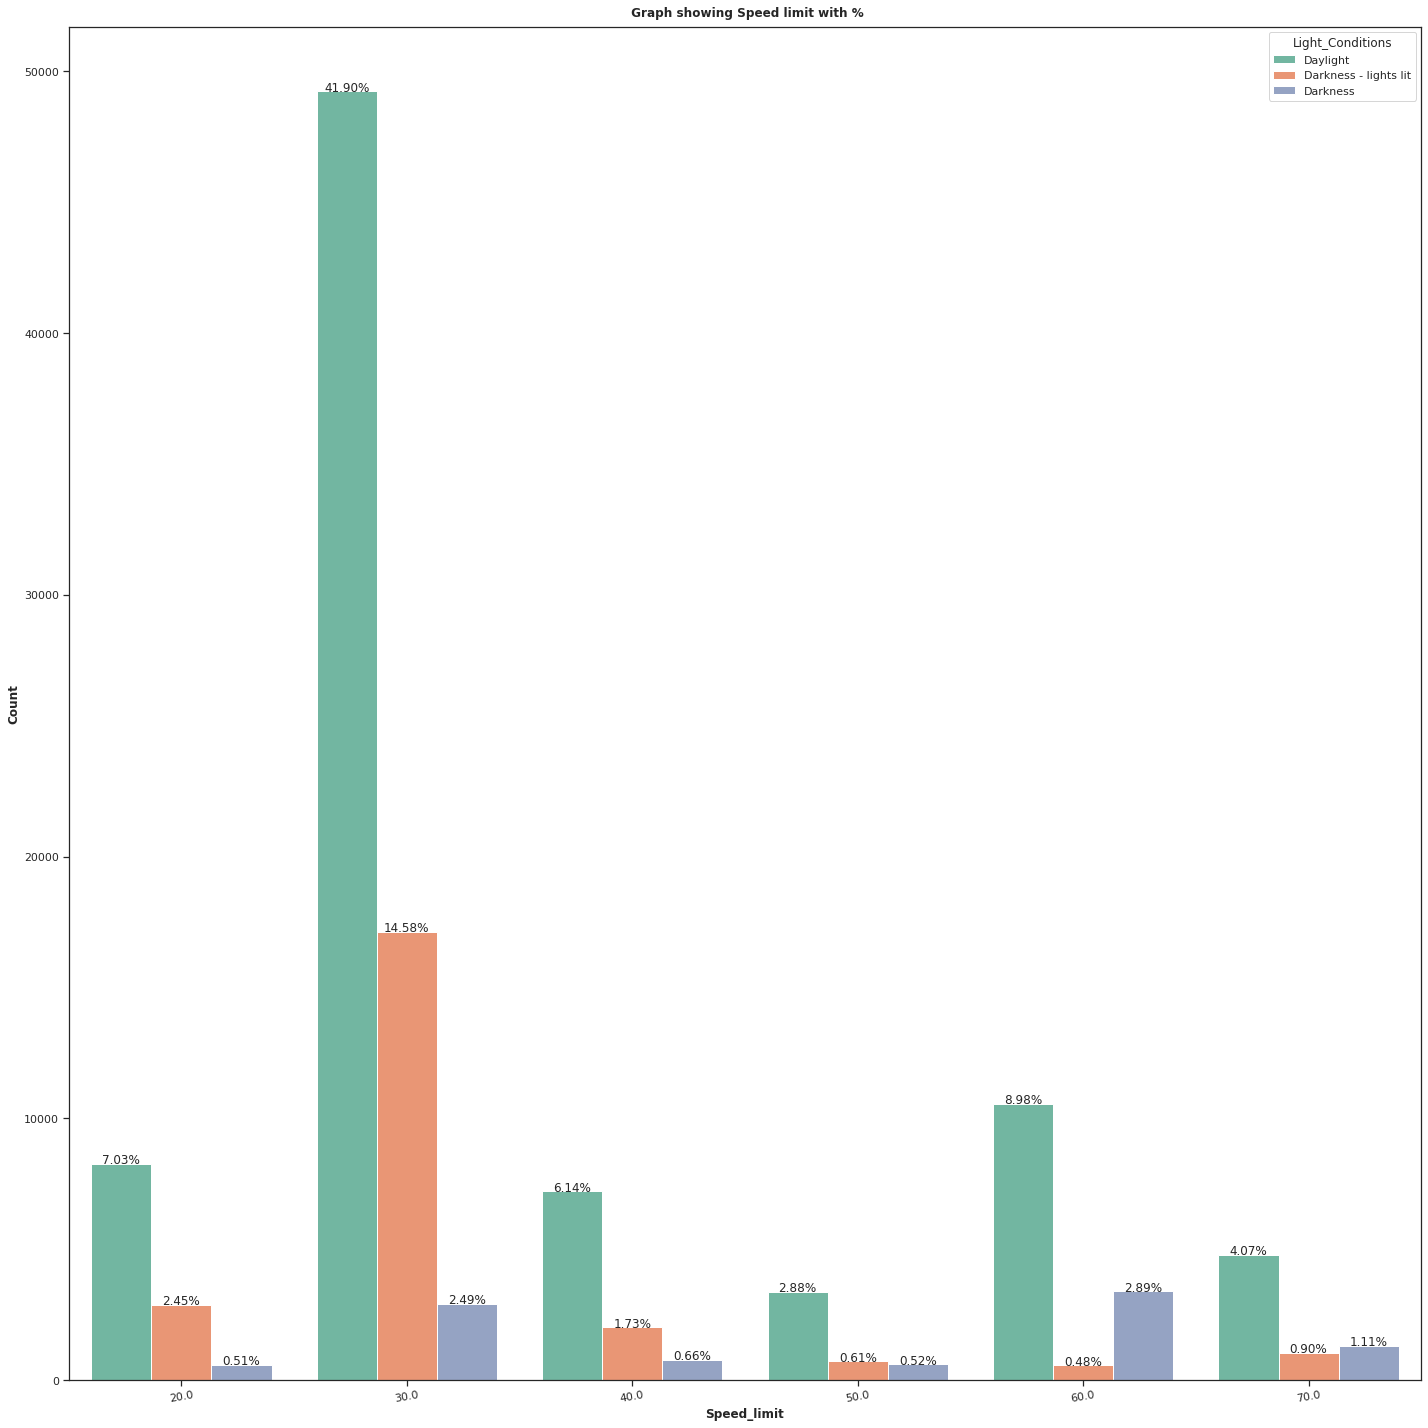

In [115]:
countplot_percentage_with_conditions(df_accident, 'Speed_limit', 'Speed limit')

(b) Light Condition



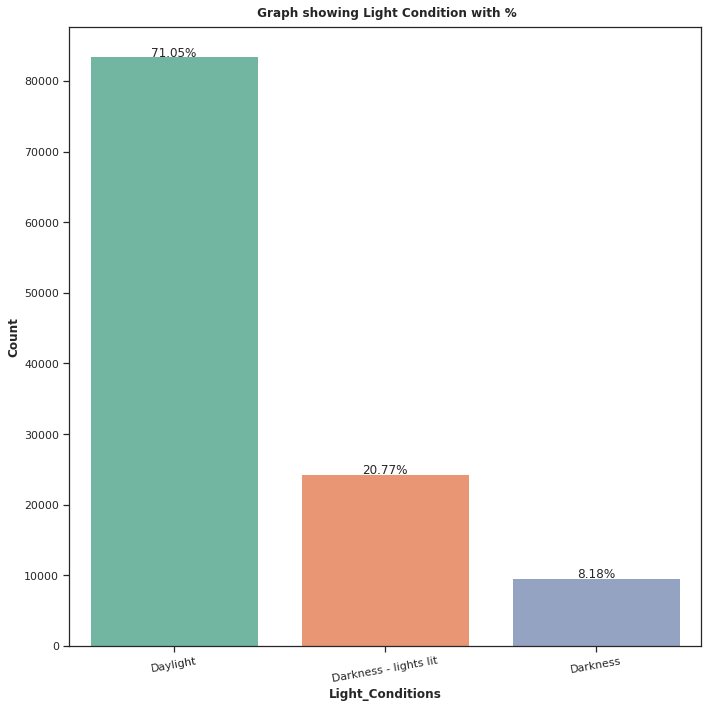

In [116]:
countplot_percentage(df_accident, 'Light_Conditions', 'Light Condition')

(c) Road Surface condition

In [117]:
df_accident['Road Surface Condition'] =  df_accident['Road_Surface_Conditions'].apply (lambda x: 'Dry' if x==1 else ('Wet' if x == 2 else 
                                                                                                ('Snow' if x== 3 else
                                                                                                ('Frost' if x== 4 else
                                                                                                ('Flood(3cm)' if x== 5 else
                                                                                                ('Oil' if x== 6 else
                                                                                                ('Mud' if x== 7 else
                                                                                                ('Unknown' if x== -1 else x ))))))))
                                                                                                
                                                                                               

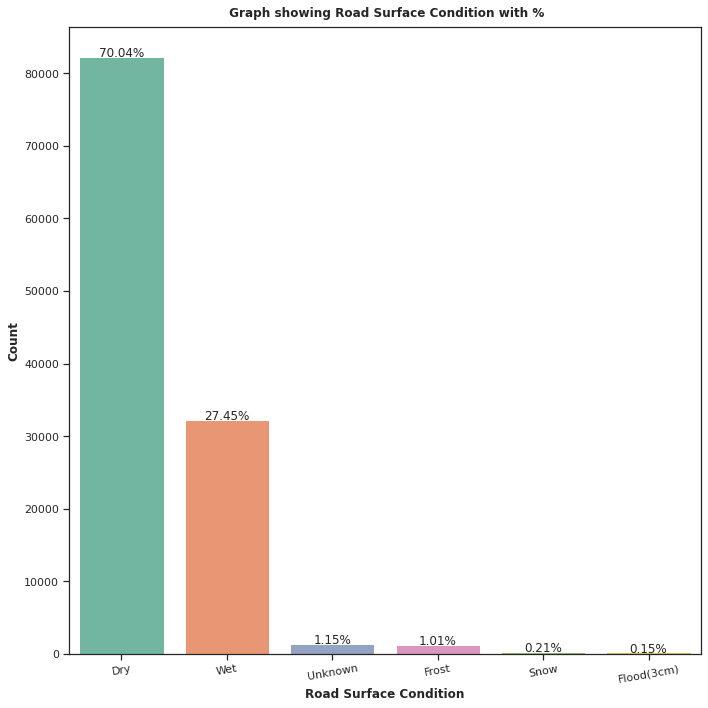

In [118]:
countplot_percentage(df_accident, 'Road Surface Condition', 'Road Surface Condition')

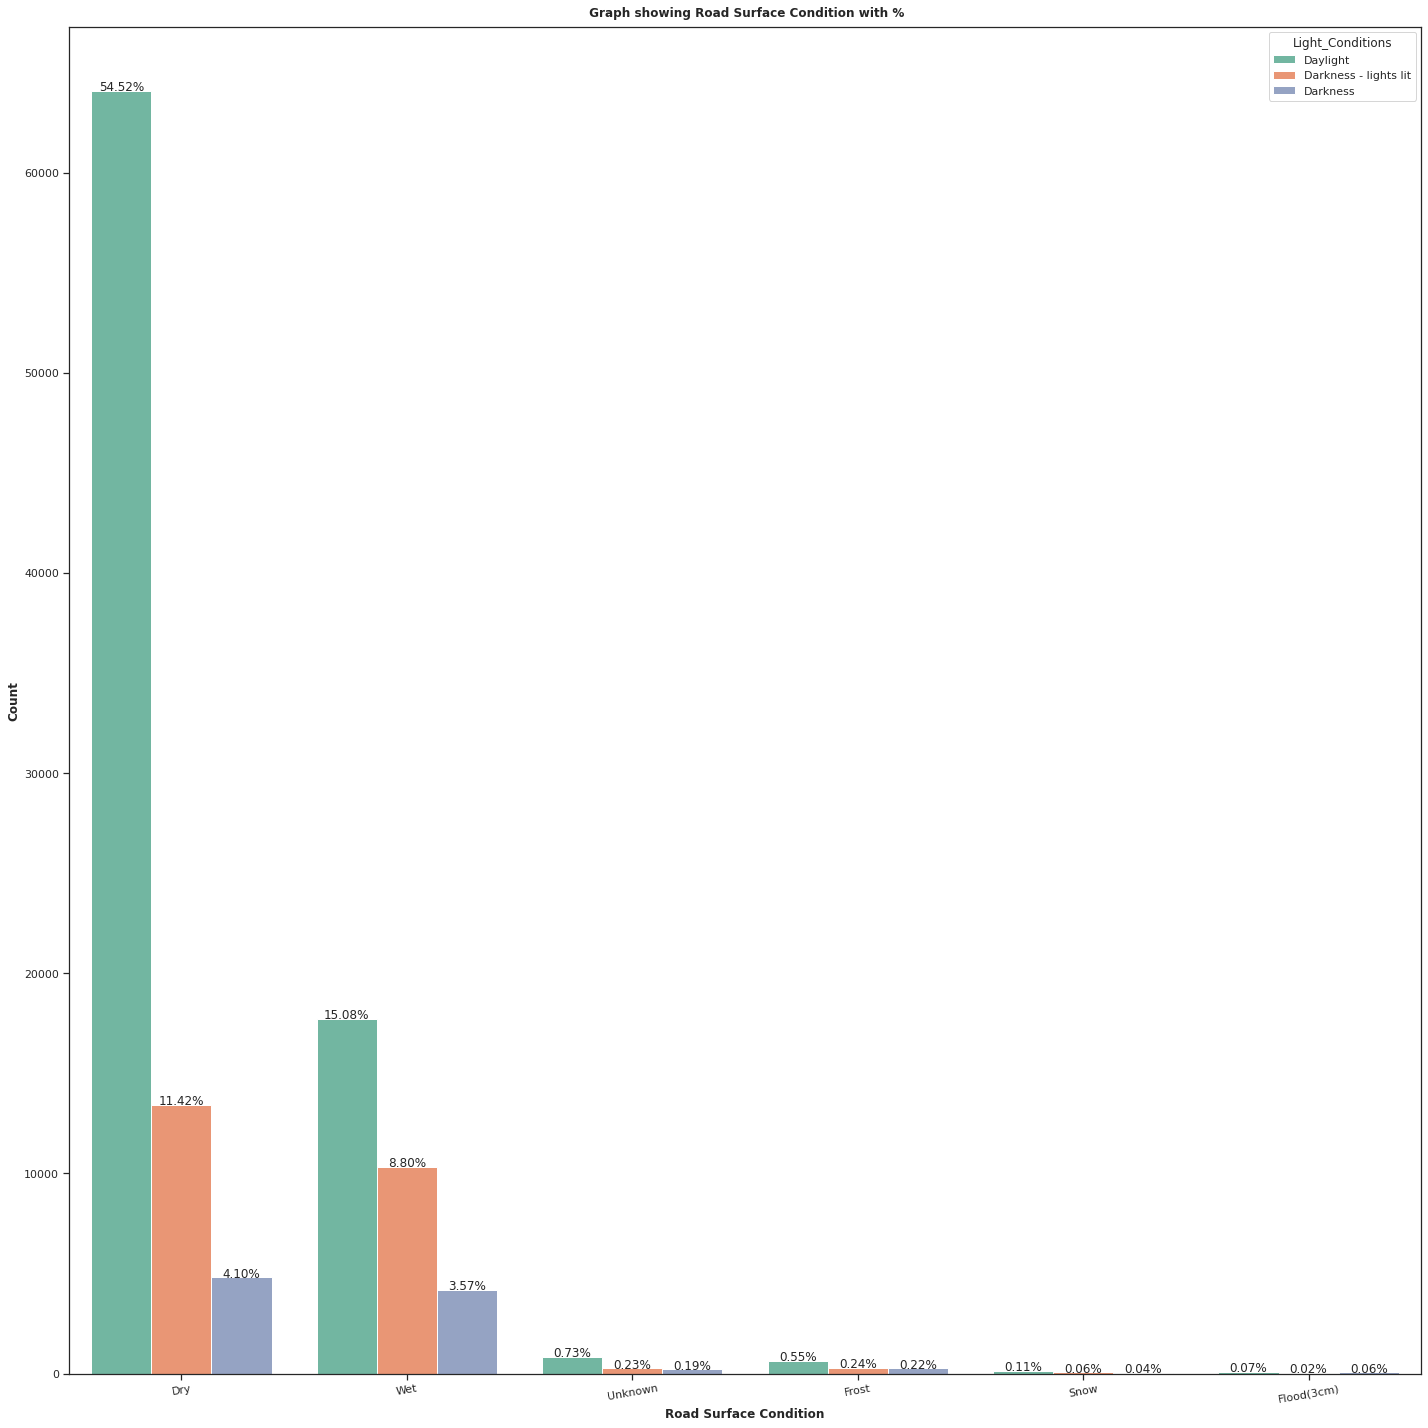

In [119]:
countplot_percentage_with_conditions(df_accident, 'Road Surface Condition', 'Road Surface Condition')

(d)dSpecial Condition at site

In [120]:
df_accident['Special Condition at site'] =  df_accident['Special_Conditions_at_Site'].apply (lambda x: 'Auto traffic signal - out' if x==1 else ('Auto signal part defective' if x == 2 else 
                                                                                                ('Road sign defective' if x== 3 else
                                                                                                ('Roadworks' if x== 4 else
                                                                                                ('Road surface defective' if x== 5 else
                                                                                                ('Oil or diesel' if x== 6 else
                                                                                                ('Mud' if x== 7 else
                                                                                                ('None' if x== 0 else
                                                                                                ('Unknown' if x== -1 else x )))))))))
                                                                                                
                                                                                               

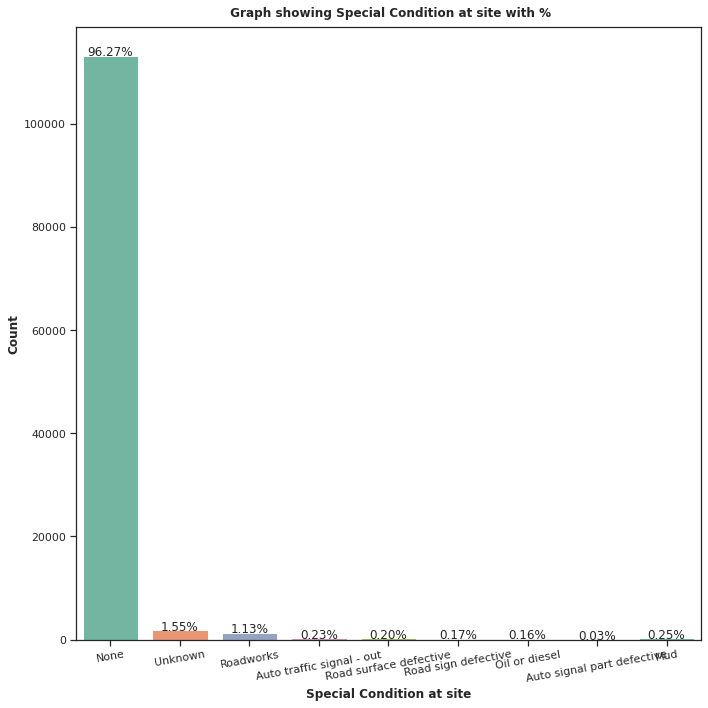

In [121]:
countplot_percentage(df_accident, 'Special Condition at site', 'Special Condition at site')

In [122]:
combined_table['Light_Conditions'].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness'], dtype=object)

In [123]:
df_accident

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Weather Conditions,Police_County,Road Surface Condition,Special Condition at site
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30.0,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,Fine,Metropolitan Police,Dry,None
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,9,E09000022,3,23,2,30.0,0,-1,-1,0,-1,-1,Darkness - lights lit,1,1,0,0,1,3,E01003117,Fine,Metropolitan Police,Dry,None
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,2,E09000007,4,504,6,30.0,3,4,6,0,0,0,Darkness - lights lit,1,1,0,0,1,1,E01000943,Fine,Metropolitan Police,Dry,None
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,3,01:20,2,E09000007,4,510,6,20.0,3,4,4,510,0,0,Darkness - lights lit,1,1,0,0,1,1,E01000973,Fine,Metropolitan Police,Dry,None
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,3,00:40,28,E09000005,3,4003,6,30.0,6,4,6,0,0,0,Darkness - lights lit,1,1,0,0,1,1,E01000546,Fine,Metropolitan Police,Dry,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,7,01:00,917,S12000006,4,725,6,60.0,0,-1,-1,0,0,0,Daylight,1,2,0,0,2,1,NaN,Fine,NaN,Wet,None
117532,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,5,08:46,917,S12000006,3,7,6,60.0,0,-1,-1,0,0,0,Daylight,1,2,0,0,2,1,NaN,Fine,NaN,Wet,None
117533,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,917,S12000006,4,723,6,60.0,3,4,4,721,0,0,Daylight,1,1,0,0,2,2,NaN,Fine,NaN,Dry,None
117534,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,7,14:10,917,S12000006,6,710,6,30.0,3,4,6,723,0,0,Daylight,1,1,0,0,2,2,NaN,Fine,NaN,Dry,None


#  Question h

(h)	How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

(a) Age of Driver

In [124]:
#Creating a column for Driver Age Band 
df_vehicles['Driver_Age_Band'] =  df_vehicles['Age_Band_of_Driver'].apply (lambda x: 'Unknown' if x==-1 else ('0-5' if x ==1 else 
                                                                                                ('6-10' if x == 2 else
                                                                                                ('11-15' if x == 3 else 
                                                                                                ('16-20' if x == 4 else 
                                                                                                ('21-25' if x == 5 else
                                                                                                ('26-35' if x == 6 else
                                                                                                ('36-45' if x == 7 else
                                                                                                ('46-55' if x == 8 else
                                                                                                ('56-65' if x == 9 else
                                                                                                ('66-75' if x ==10 else 'Over 75' )))))))))))
                                                                                                
                                                                                               

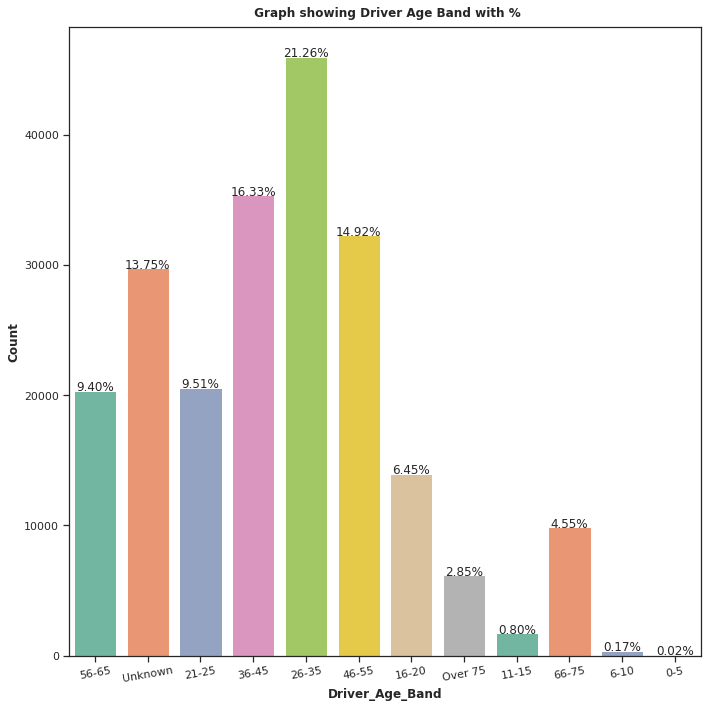

In [125]:
countplot_percentage(df_vehicles, 'Driver_Age_Band', 'Driver Age Band')

Text(0, 0.5, 'Number of accidents')

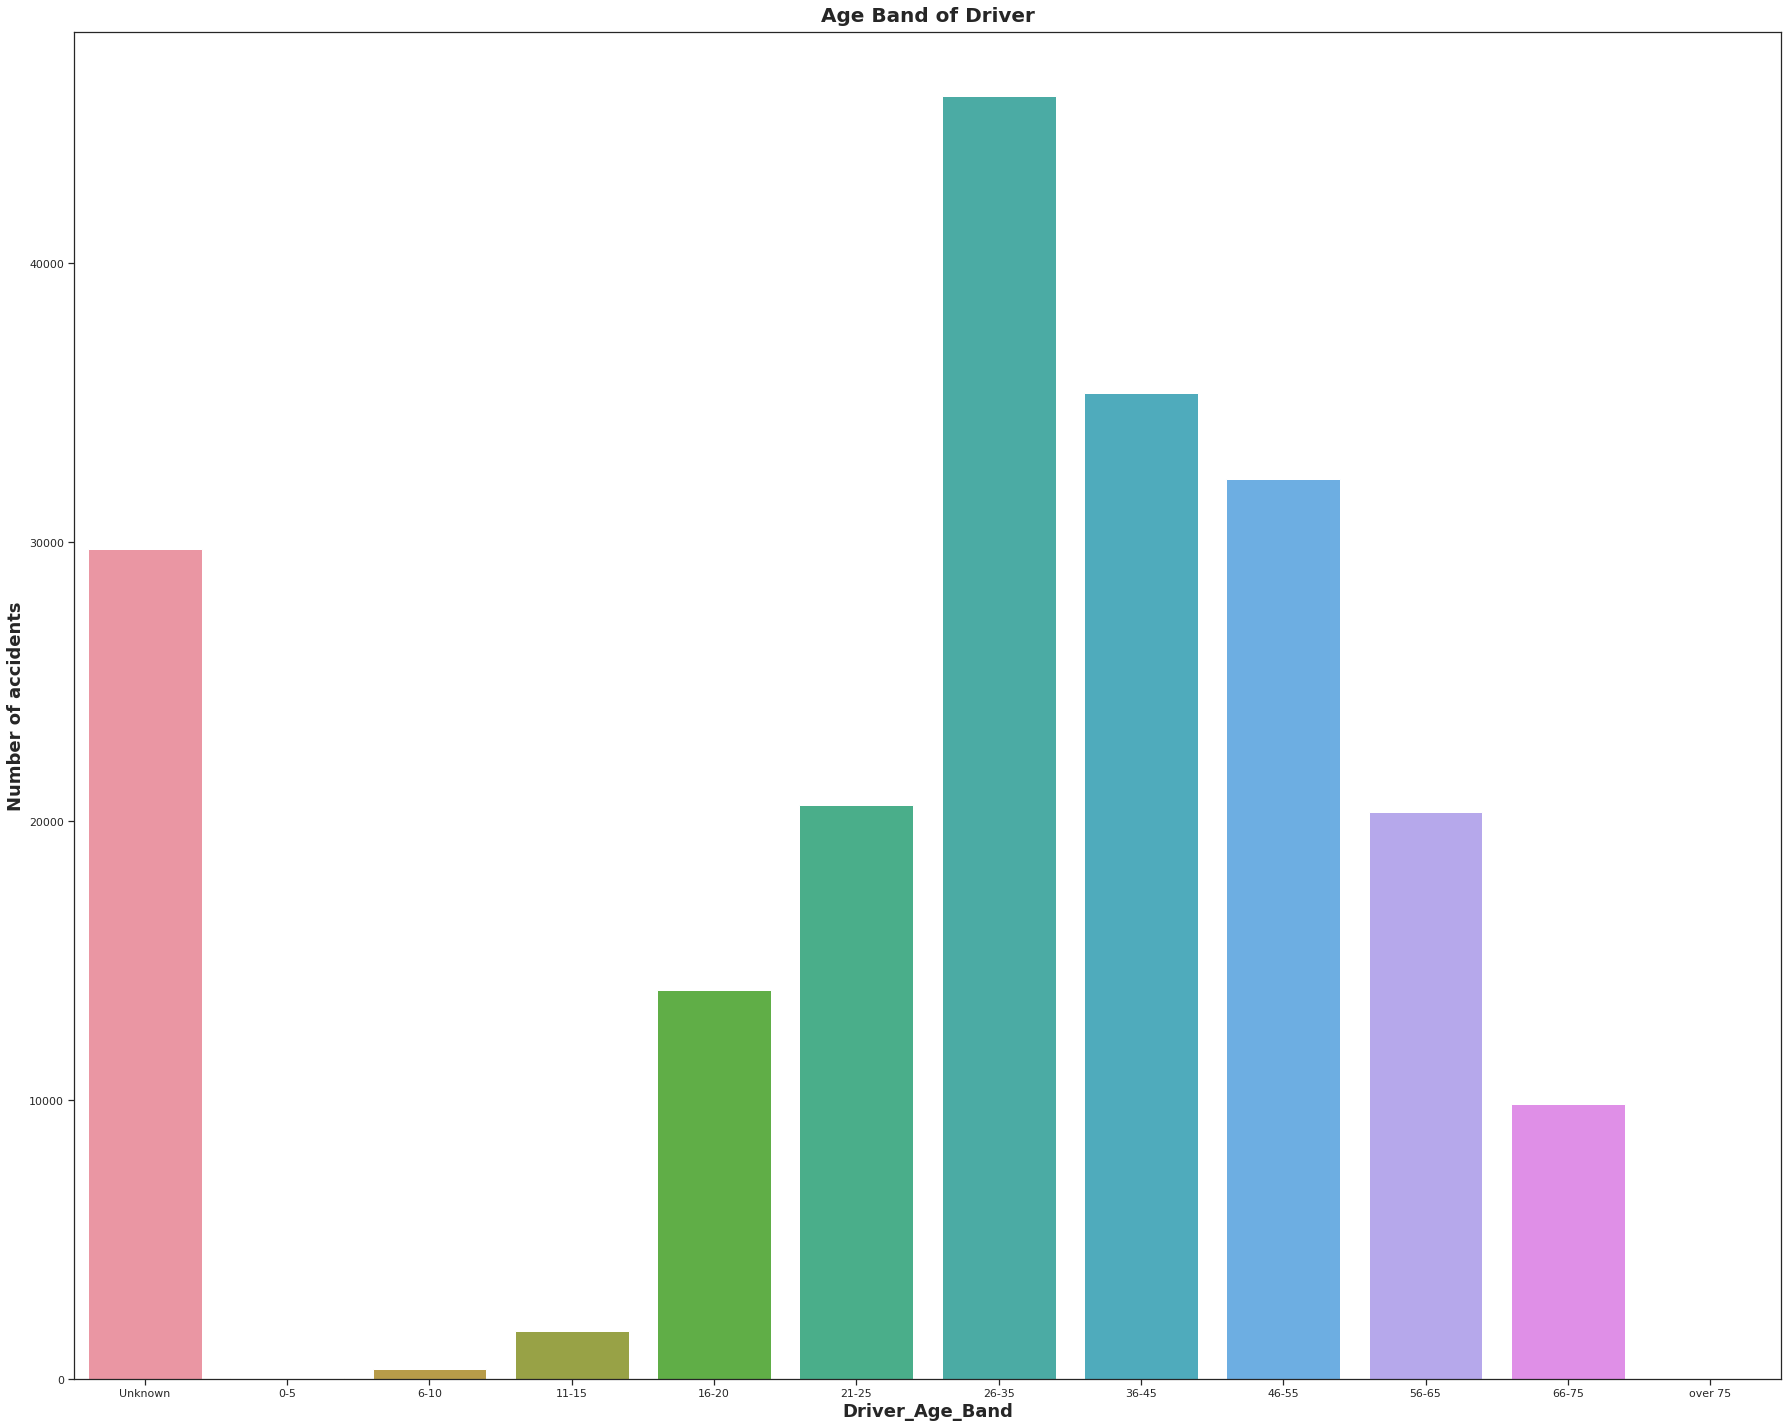

In [126]:
#Plotting the graphs showing number of accidents in each age band
plt.figure(figsize = (25,20))
order =["Unknown",'0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','over 75']
ax = sns.countplot(x="Driver_Age_Band", data=df_vehicles, order = order)
ax.set_title('Age Band of Driver', fontsize = 20)
plt.xlabel("Driver_Age_Band",fontsize=18)
plt.ylabel("Number of accidents", fontsize=18)

(b) Purpose of Journey

In [127]:
#Modifying the Journey_Purpose_of_Drivery column 
combined_table['Journey Purpose of Driver'] =  combined_table['Journey_Purpose_of_Driver'].apply (lambda x: 'Unknown' if x==-1 or x== 6 else ('Journey as part of work' if x ==1 else 
                                                                                                ('Commuting to/from work' if x == 2 else
                                                                                                ('Taking pupil to/from school' if x == 3 else 
                                                                                                ('Pupil riding to/from school' if x == 4 else 
                                                                                                ('Other' if x == 5 else
                                                                                                ('Other/Not known (2005-10)' if x == 15  else x )))))))                                                                                               
                                                                                             

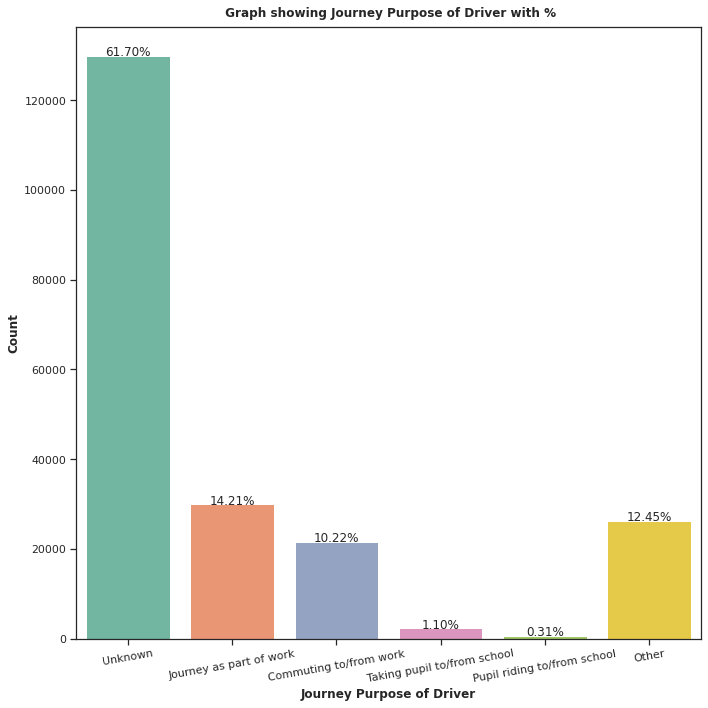

In [128]:
#Plotting the graphy showing journey purpose...
countplot_percentage(combined_table, 'Journey Purpose of Driver', 'Journey Purpose of Driver')

categorizing the Journey Purpose of Driver into driver's gender or sex. To further detect if some gender has more accident due to a purpose

In [129]:
#Modifying the sex of driver column 
combined_table['Sex of Driver'] =  combined_table['Sex_of_Driver'].apply (lambda x: 'Unknown' if x==-1 or x== 3 else ('Male' if x ==1 else ('Female' if x == 2 else x )))

Text(0, 0.5, 'Number of accidents')

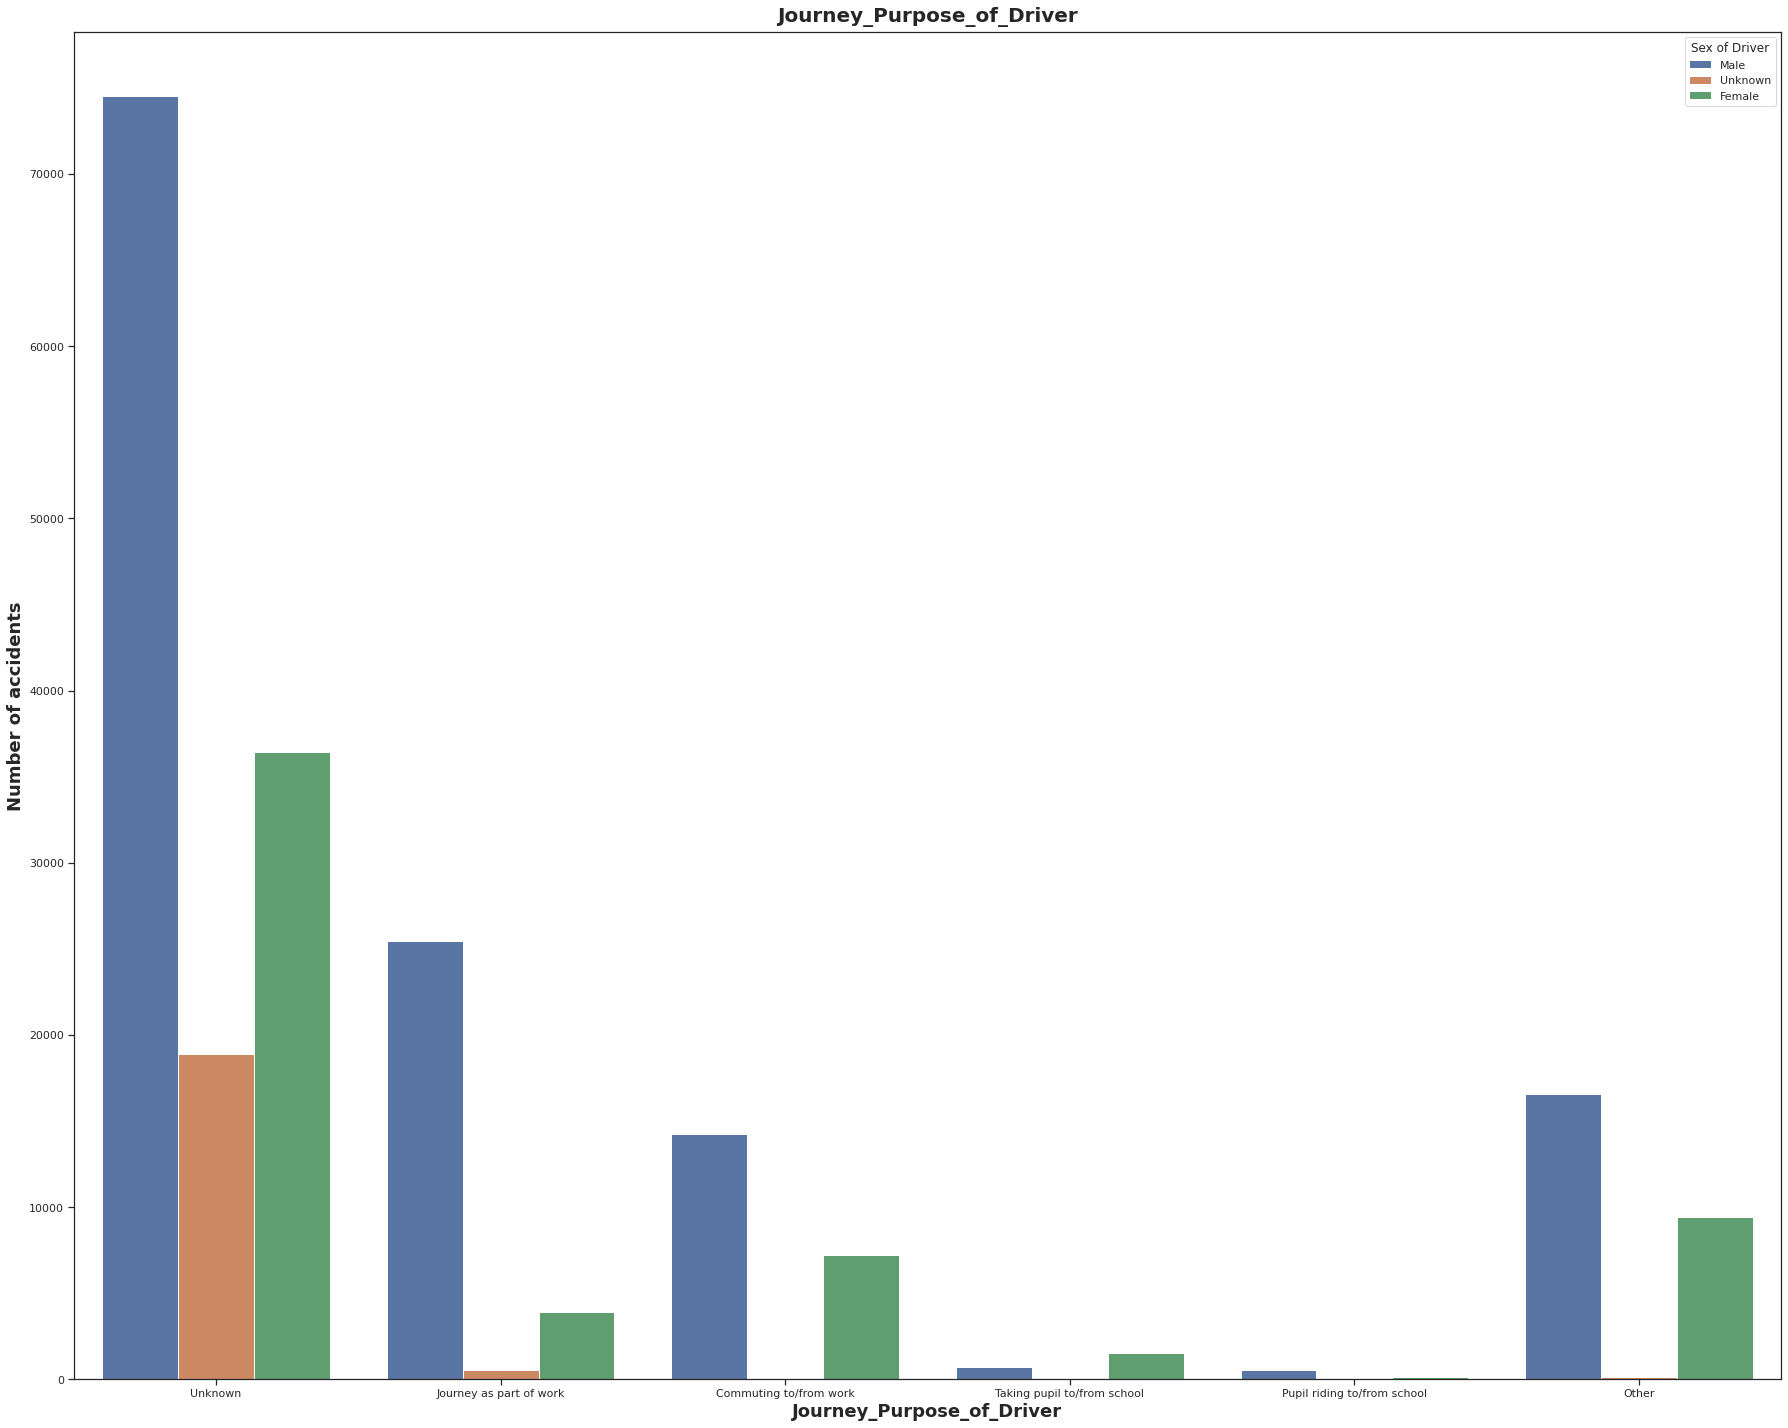

In [130]:
plt.figure(figsize = (25,20))
ax = sns.countplot(x="Journey Purpose of Driver", data=combined_table, hue = 'Sex of Driver' )
ax.set_title('Journey_Purpose_of_Driver', fontsize = 20)
plt.xlabel("Journey_Purpose_of_Driver",fontsize=18)
plt.ylabel("Number of accidents", fontsize=18)

Above there is an indication that women have accidents than men while taking there pupils to school

# Question i

Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models? 

In [131]:
#saving combined_table in another variable to be used later
combined_tables=combined_table.copy()
#dropping some columns
combined_table.drop(['Weekdays', 'Actual_vehicle_name','Grouping_Enginecapacity','Vehicle_Age_Band','Weather Conditions','Journey Purpose of Driver', 'Sex of Driver', 'LSOA_of_Accident_Location', 'Local_Authority_(Highway)', 'Date','Accident_Index'], axis =1, inplace= True)

In [132]:
combined_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210440 entries, 0 to 210439
Data columns (total 69 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Location_Easting_OSGR                        210440 non-null  float64       
 1   Location_Northing_OSGR                       210440 non-null  float64       
 2   Longitude                                    210440 non-null  float64       
 3   Latitude                                     210440 non-null  float64       
 4   Police_Force                                 210440 non-null  int64         
 5   Accident_Severity                            210440 non-null  int64         
 6   Number_of_Vehicles                           210440 non-null  int64         
 7   Number_of_Casualties                         210440 non-null  int64         
 8   Day_of_Week                                  210440 non-null  in

In [133]:
combined_table.head(3)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Dates,Week,Month
0,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2,17:50,1,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,2019-02-18,8,2
1,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2,17:50,1,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,2019-02-18,8,2
2,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2,17:50,1,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,2019-02-18,8,2


Time is an important variable but still in object dtype...Converting it to a format (all in minutes and turned to integers) that can be used for training the mode

In [134]:
def time_to_minutes(string):
    value1=string[0:2]
    value2=string[3:5]
    return ((int(value1)*60)+int(value2))

combined_table['Minutes'] = combined_table['Time'].apply(lambda x: time_to_minutes(x))

In [135]:
#confirming if the minutes column in integer format has 
combined_table.head(3)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Dates,Week,Month,Minutes
0,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2,17:50,1,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,2019-02-18,8,2,1070
1,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2,17:50,1,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,2019-02-18,8,2,1070
2,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2,17:50,1,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,2019-02-18,8,2,1070


Dropping Irrelevant columns

In [136]:
combined_table= combined_table.drop(['Time','Dates', ], axis=1)

# FEATURE SELECTION AND ENGINEERING

Encoding the Light_Conditions column again for Machine Learning

In [137]:
combined_table['Light_Conditions'] =  combined_table['Light_Conditions'].apply (lambda x: 1 if x=='Daylight'  else (4 if x=='Darkness - lights lit' else 
                                                                                                (5 if x=='Darkness' else x ))) 
                                                                                                

In [138]:
combined_table['Light_Conditions'].unique()# comfirming

array([1, 4, 5])

SELECTING THE BEST FEATURES FOR MACHINE LEARNING

In [139]:
all_columns=combined_table.columns

In [140]:
# def replace_nan_negative(columns):
for columns in all_columns:
  combined_table[columns] = combined_table[columns].replace(-1,combined_table[columns].median())


In [141]:
# #turning all values of dataframe to positive
combined_table=combined_table.applymap(lambda x: abs(x))

In [142]:
combined_table.head(3)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Week,Month,Minutes
0,528218.0,180407.0,0.153842,51.508057,1,3,2,3,2,1,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,17,0,1,0,0,0,0,4,1,6,1,58,9,1398,1,5,2,1,2,17,8,2,1070
1,528218.0,180407.0,0.153842,51.508057,1,3,2,3,2,1,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,17,0,1,0,0,0,0,1,1,6,3,35,6,1398,1,5,2,1,2,17,8,2,1070
2,528218.0,180407.0,0.153842,51.508057,1,3,2,3,2,1,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,1,2,2,2,34,6,3,0,0,1,0,0,9,1,5,1,9,0,17,0,1,0,0,0,0,4,1,6,1,58,9,1398,1,5,2,1,2,17,8,2,1070


Selecting the Best Features

In [143]:
# #I will be using kbest and chi square libraries from sklearn to rank the features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [144]:
X=combined_table.drop(['Accident_Severity'], axis=1)
y=combined_table['Accident_Severity']

In [145]:
# # Using SelectKBest 
ranking_independent_attributes=SelectKBest(score_func=chi2,k=60)
ranking_attributes=ranking_independent_attributes.fit(X,y)

In [146]:
dfscores=pd.DataFrame(ranking_attributes.scores_,columns=["Score of Attribute"])
dfcolumns=pd.DataFrame(X.columns)

In [147]:
Attributes_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [148]:
Attributes_rank.columns=['Attributes','Score']
Attributes_rank

,Attributes,Score
0,Location_Easting_OSGR,8.451346e+06
1,Location_Northing_OSGR,1.425595e+08
2,Longitude,6.520292e+02
3,Latitude,6.911287e+01
4,Police_Force,3.511311e+04
...,...,...
62,Vehicle_IMD_Decile,3.530107e+02
63,Hour,4.741880e+00
64,Week,1.856138e+02
65,Month,9.599412e+01


In [149]:
# #saving the ranked attributes in a variable
g=Attributes_rank.nlargest(67,'Score')
g

,Attributes,Score
1,Location_Northing_OSGR,1.425595e+08
0,Location_Easting_OSGR,8.451346e+06
57,Engine_Capacity_(CC),9.930579e+05
16,2nd_Road_Number,6.046733e+05
8,Local_Authority_(District),3.041904e+05
...,...,...
53,Journey_Purpose_of_Driver,2.207817e+01
26,Vehicle_Reference_x,1.834626e+01
7,Day_of_Week,6.427755e+00
63,Hour,4.741880e+00


Getting the fiest 40 best attributes

In [150]:
# #Getting the fiest 40 best attributes
pd.set_option('display.max_rows', None)
X_attributes = g[:67]
X_attributes

,Attributes,Score
1,Location_Northing_OSGR,1.425595e+08
0,Location_Easting_OSGR,8.451346e+06
57,Engine_Capacity_(CC),9.930579e+05
16,2nd_Road_Number,6.046733e+05
8,Local_Authority_(District),3.041904e+05
10,1st_Road_Number,6.071014e+04
4,Police_Force,3.511311e+04
12,Speed_limit,2.910000e+04
49,Vehicle_Leaving_Carriageway,1.294580e+04
50,Hit_Object_off_Carriageway,1.192502e+04


Checking if the data is imbalance

In [151]:
#Checking if the data is imbalance
combined_table['Accident_Severity'].value_counts()

3    162528
2     43369
1      4543
Name: Accident_Severity, dtype: int64

In [152]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import MinMaxScaler


X=combined_table.drop(['Accident_Severity', 'Was_Vehicle_Left_Hand_Drive?','1st_Road_Number','Minutes','Hour','Day_of_Week','Location_Easting_OSGR','Vehicle_Reference_x'], axis=1)
y=combined_table['Accident_Severity']

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2, random_state=42)

SCALING

Some figures are relatively high such as Location_Easting_OSGR . We therefore scale the dataframe to avoid poor model performance

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


CHECKING THE DATA IMBALANCE

In [154]:
#The data is imbalanced as seen below
y_train.value_counts()

3    129958
2     34719
1      3675
Name: Accident_Severity, dtype: int64

In [155]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =2)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

In [156]:
#Counting the dependent variable after over sampling
y_train_res.value_counts() # values are balanced now

2    129958
3    129958
1    129958
Name: Accident_Severity, dtype: int64

In [157]:
from sklearn import ensemble

In [158]:
Random_forest_classifier=ensemble.RandomForestClassifier()
Random_forest_classifier.fit(X_train_res, y_train_res)
Random_forest_classifier.score(X_test, y_test)

0.9709655958943166

In [159]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
y_pred = Random_forest_classifier.predict(X_test)
Random_forest_classifier.score(X_test, y_test) #Checks the classifier's the score
print(confusion_matrix(y_test, y_pred))

#This gives the precision, recall, f1-score and support

print(classification_report(y_test, y_pred))

print("The Accuracy is :",metrics.accuracy_score(y_pred, y_test))

[[  717    78    73]
 [    0  7604  1046]
 [    0    25 32545]]
              precision    recall  f1-score   support

           1       1.00      0.83      0.90       868
           2       0.99      0.88      0.93      8650
           3       0.97      1.00      0.98     32570

    accuracy                           0.97     42088
   macro avg       0.98      0.90      0.94     42088
weighted avg       0.97      0.97      0.97     42088

The Accuracy is : 0.9709655958943166


FUNCTIONS TO TRAIN MODELS: Printing thei performances

In [160]:
#Creating a dictionary with the classifiers
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

classifiers = {'Gradient Boost':ensemble.GradientBoostingClassifier(),'Logistic Regression':LogisticRegression(), 'Random Forest': ensemble.RandomForestClassifier(), 'Decision Tree': tree.DecisionTreeClassifier() }

In [161]:
def classifier_performance(classifiers, X, y,X_train_res):
  for i, j in classifiers.items():
    classi = j
    classi = classi.fit(X, y)
    y_pred = classi.predict(X_train_res)
    performance = accuracy_score(y_test, y_pred)
    targets = [1,2,3]
    print(f" The accuracy is {i} is {performance}")
    print(classification_report(y_test, y_pred))

In [162]:
classifier_performance(classifiers, X_train, y_train, X_test)

 The accuracy is Gradient Boost is 0.9425964645504656
              precision    recall  f1-score   support

           1       0.99      0.60      0.74       868
           2       0.96      0.77      0.86      8650
           3       0.94      1.00      0.97     32570

    accuracy                           0.94     42088
   macro avg       0.96      0.79      0.86     42088
weighted avg       0.94      0.94      0.94     42088



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


 The accuracy is Logistic Regression is 0.9347557498574416
              precision    recall  f1-score   support

           1       0.89      0.45      0.60       868
           2       0.92      0.77      0.84      8650
           3       0.94      0.99      0.96     32570

    accuracy                           0.93     42088
   macro avg       0.92      0.74      0.80     42088
weighted avg       0.93      0.93      0.93     42088

 The accuracy is Random Forest is 0.9673778749287207
              precision    recall  f1-score   support

           1       1.00      0.78      0.88       868
           2       0.99      0.86      0.92      8650
           3       0.96      1.00      0.98     32570

    accuracy                           0.97     42088
   macro avg       0.98      0.88      0.93     42088
weighted avg       0.97      0.97      0.97     42088

 The accuracy is Decision Tree is 0.9524567572704808
              precision    recall  f1-score   support

           1      

COMPARING WITH GOVERMENT MODEL

The best model is the random forest model with 97% accuracy. This will be compared with the governmrnt model

In [163]:
# Prints the CAS adjustment file
# government_details = pd.read_csv('/content/gdrive/MyDrive/Big Data Files/cas_adjustment_lookup_2019.csv')
government_details.head(3)


,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based
0,200401BS00001,1,1,0.239280,0.760720,0
1,200401BS00002,1,1,1.000000,0.000000,0
2,200401BS00003,1,1,0.057141,0.942859,0


In [164]:
# #Running the Random forest classifier again
Random_forest_classifier=ensemble.RandomForestClassifier()
Random_forest_classifier.fit(X_train_res, y_train_res)
Random_forest_classifier.score(X_test, y_test)

0.9706567192548945

In [165]:
y_predic = Random_forest_classifier.predict(X_train_res)
#gets the probability values
y_predic_proba = Random_forest_classifier.predict_proba(X_train_res)[: ][: , 1]

In [166]:
y_predic_proba

array([0.98, 0.98, 0.  , ..., 0.97, 0.99, 0.98])

In [167]:
len(y_predic_proba)

389874

In [168]:
pred = y_predic_proba[:210440]

In [169]:
len(pred)==len(combined_tables)

True

In [170]:
#creates a column for propability for slight in the combined dataframe
combined_tables['Probabiliy_Slight']=pd.Series(pred)

In [171]:
combined_tables.head(1)#confirming the new column

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name,Dates,Week,Month,Grouping_Enginecapacity,Vehicle_Age_Band,Weather Conditions,Journey Purpose of Driver,Sex of Driver,Probabiliy_Slight
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine,Unknown,Male,0.98


In [172]:
# combined_tables.info()

In [173]:
# #creates a column for propability for slight in the combined dataframe
# combined_tables['Probabiliy_Slight'] = pred

# #creates a column for propability for serious or fatal accidents in the combined dataframe
# combined_tables['Probalility_Serious'] = 1 - y_predic_proba

In [174]:
#Creating a unique column for the combined dataframe to merge with cas dataframe (i.e. government_details)
combined_tables['General_Reference'] = combined_tables['Accident_Index'].astype(str) + combined_tables['Vehicle_Reference_x'].astype(str) + combined_tables['Casualty_Reference'].astype(str)
combined_tables['General_Reference'] = combined_tables['General_Reference'].astype(str)

In [175]:
combined_tables.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name,Dates,Week,Month,Grouping_Enginecapacity,Vehicle_Age_Band,Weather Conditions,Journey Purpose of Driver,Sex of Driver,Probabiliy_Slight,General_Reference
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine,Unknown,Male,0.98,201901012830011
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine,Unknown,Unknown,0.98,201901012830011


In [176]:
#Creating the same unique column for the cas dataframe

government_details['General_Reference'] = government_details['accident_index'].astype(str) + government_details['Vehicle_Reference'].astype(str) + government_details['Casualty_Reference'].astype(str)
government_details['General_Reference'] = government_details['General_Reference'].astype(str)

In [177]:
government_details.head(2)

,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based,General_Reference
0,200401BS00001,1,1,0.23928,0.76072,0,200401BS0000111
1,200401BS00002,1,1,1.00000,0.00000,0,200401BS0000211


In [178]:
combined_tables.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Vehicle_Reference_y,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Hour,Weekdays,Actual_vehicle_name,Dates,Week,Month,Grouping_Enginecapacity,Vehicle_Age_Band,Weather Conditions,Journey Purpose of Driver,Sex of Driver,Probabiliy_Slight,General_Reference
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine,Unknown,Male,0.98,201901012830011
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine,Unknown,Unknown,0.98,201901012830011
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine,Unknown,Male,0.00,201901012830012
3,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine,Unknown,Unknown,0.01,201901012830012
4,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,Daylight,1,1,0,0,1,3,E01004762,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,17,Monday,Car,2019-02-18,8,2,Unknown,Unknown,Fine,Unknown,Male,0.00,201901012830013


Merging the two dataframes

In [179]:
merged_df =combined_tables.merge(government_details, on = 'General_Reference')

Reference: http://net-informations.com/ds/psa/rmse.htm#:~:text=Mean%20Squared%20Error%20(MSE)%20%3D,values%20or%20too%20low%20values).

In [180]:
#Comparing the governmernt and combined dataframe
from sklearn.metrics import mean_squared_error
comparison = np.sqrt(mean_squared_error(merged_df['Probabiliy_Slight'],merged_df['Adjusted_Slight']))
print(comparison)

0.8025023148274549
